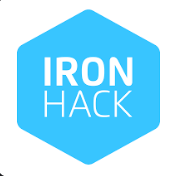

<h1 style="color: #008080;">Mid Project_Shark tank US case</h1>

<h1 style="color: #ffc512;">Data Template: Extraction & Cleaning</h1>

<h1 style="color: #ffc512;">00 |</h1>

In [5]:
#pip install category_encoders
#pip install imblearn

In [6]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones matemáticas

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

import scipy.stats as st 
import statsmodels.api as sm
import statsmodels.formula.api as smf


# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

from sklearn.decomposition import PCA


In [7]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #ffc512;">01 | Data Extraction</h1>

In [9]:
data = pd.read_csv('Shark Tank US.csv')
data.sample(10)

Season Number  Episode Number  Pitch Number Original Air Date  \
357               5              24           358        2014-04-11   
334               5              18           335        2014-02-27   
811              10               3           812        2018-10-21   
707               9               1           708        2017-10-01   
1094             13               1          1095        2021-10-08   
1151             13              16          1152        2022-03-18   
542               7              12           543        2016-01-05   
146               3              12           147        2012-04-27   
535               7              11           536        2015-12-11   
178               4               5           179        2012-10-12   

                     Startup Name                 Industry  \
357   QuickstopFireSprinklerTools           Lifestyle/Home   
334                       Cheek'd            Software/Tech   
811                    Soupergirl        Food and Beverage   
707                   LockerBoard  Fitness/Sports/Outdoors   
1094                       Pashko           Fashion/Beauty   
1151                      Sunflow        Business Services   
542                     FireAvert           Lifestyle/Home   
146          DebbieBrooksHandbags           Fashion/Beauty   
535                    GeekMyTree           Lifestyle/Home   
178                  WiredWaffles        Food and Beverage   

                                   Business Description Pitchers Gender  \
357   Quickstop Fire Sprinkler Tools - Productivity ...            Male   
334                         Cheek'd - Consumer Services          Female   
811                        Soupergirl - healthier soups          Female   
707             skateboard that can fit inside a locker      Mixed Team   
1094                            Community-made apparels            Male   
1151      Easy-fold beach chairs with accessory options      Mixed Team   
542                        device which shuts off power            Male   
146        Debbie Brooks Handbags - Women's Accessories      Mixed Team   
535         Christmas tree lights with smart technology            Male   
178                      Wired Waffles - Specialty Food            Male   

     Pitchers City Pitchers State Pitchers Average Age  \
357      San Diego             CA                  NaN   
334       New York             NY                  NaN   
811            NaN             DC                  NaN   
707            NaN             CA                  NaN   
1094           NaN            NaN               Middle   
1151           NaN            NaN               Middle   
542            NaN            NaN               Middle   
146       New York             NY                  NaN   
535            NaN            NaN                  NaN   
178        Seattle             WA                  NaN   

                   Entrepreneur Names               Company Website  \
357                               NaN  http://www.quickstoptool.com   
334                        Lori Cheek             http://cheekd.com   
811                               NaN                           NaN   
707                               NaN                           NaN   
1094                 Patrick Robinson                    paskho.com   
1151       Greg Besner and Leslie Hsu                           NaN   
542                      Peter Thorpe                           NaN   
146   Paul d'Auriac and Debbie Brooks  http://www.debbiebrooks.com/   
535                               NaN                           NaN   
178                    Roger Sullivan   http://www.wiredwaffles.com   

      Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
357                      0.0           6.95               150000   
334                      0.0           7.79               100000   
811                      NaN           3.90               500000   
707                   

In [10]:
df= data.copy()

<h2 style="color: #008080;">Exploring the Data (First Impression)</h2>

In [12]:
df.shape

(1274, 48)

In [13]:
#Use snake case, removing space in columns
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [14]:
df.dtypes

season_number                           int64
episode_number                          int64
pitch_number                            int64
original_air_date                      object
startup_name                           object
industry                               object
business_description                   object
pitchers_gender                        object
pitchers_city                          object
pitchers_state                         object
pitchers_average_age                   object
entrepreneur_names                     object
company_website                        object
multiple_entrepreneurs                float64
us_viewership                         float64
original_ask_amount                     int64
original_offered_equity               float64
valuation_requested                     int64
got_deal                                int64
total_deal_amount                     float64
total_deal_equity                     float64
deal_valuation                    

**First impression:**
    
_____________

The following dataset is a collection of information of entrepreneurs pitching their product/service to the potential invester, distributed among 48 different columns. The majority of our data types are mostly **numericals** 

**project goal** is to identify factors influenced getting the deal from the investors?  such as Industry, State or City of start up.

Further we check whether the amount of Total deal after negotiation between investors and entrepreneurs was equal to the asked amount by entrepreneurs or not?
       And whether investors get lower equity that offered by entrepreneur or not?

1. The **target** of our dataset will be `got deal`, which shows whether the entrepreneurs got the deal from the investors or not. 
2. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________

<h2 style="color: #008080;">Checking Null Values</h2>

In [17]:
df.isnull().sum()

season_number                            0
episode_number                           0
pitch_number                             0
original_air_date                        0
startup_name                             0
industry                                 0
business_description                     0
pitchers_gender                          7
pitchers_city                          772
pitchers_state                         528
pitchers_average_age                   936
entrepreneur_names                     495
company_website                        758
multiple_entrepreneurs                 427
us_viewership                            0
original_ask_amount                      0
original_offered_equity                  0
valuation_requested                      0
got_deal                                 0
total_deal_amount                      509
total_deal_equity                      509
deal_valuation                         509
number_of_sharks_in_deal               509
investment_

In [18]:
df.columns

Index(['season_number', 'episode_number', 'pitch_number', 'original_air_date',
       'startup_name', 'industry', 'business_description', 'pitchers_gender',
       'pitchers_city', 'pitchers_state', 'pitchers_average_age',
       'entrepreneur_names', 'company_website', 'multiple_entrepreneurs',
       'us_viewership', 'original_ask_amount', 'original_offered_equity',
       'valuation_requested', 'got_deal', 'total_deal_amount',
       'total_deal_equity', 'deal_valuation', 'number_of_sharks_in_deal',
       'investment_amount_per_shark', 'equity_per_shark', 'royalty_deal',
       'loan', 'barbara_corcoran_investment_amount',
       'barbara_corcoran_investment_equity', 'mark_cuban_investment_amount',
       'mark_cuban_investment_equity', 'lori_greiner_investment_amount',
       'lori_greiner_investment_equity', 'robert_herjavec_investment_amount',
       'robert_herjavec_investment_equity', 'daymond_john_investment_amount',
       'daymond_john_investment_equity', 'kevin_o_leary_inv

<h2 style="color: #008080;">Standardize Columns</h2>

<h1 style="color: #ffc512;">02 | Data Cleaning</h1>

In [21]:
df.head(5)

season_number  episode_number  pitch_number original_air_date  \
0              1               1             1        2009-08-09   
1              1               1             2        2009-08-09   
2              1               1             3        2009-08-09   
3              1               1             4        2009-08-09   
4              1               1             5        2009-08-09   

               startup_name           industry  \
0            AvaTheElephant    Health/Wellness   
1        Mr.Tod'sPieFactory  Food and Beverage   
2                   Wispots  Business Services   
3  CollegeFoxesPackingBoxes     Lifestyle/Home   
4                  IonicEar      Software/Tech   

                              business_description pitchers_gender  \
0           Ava The Elephant - Baby and Child Care          Female   
1           Mr. Tod's Pie Factory - Specialty Food            Male   
2                      Wispots - Consumer Services            Male   
3  College Foxes Packing Boxes - Consumer Services            Male   
4                            Ionic Ear - Novelties            Male   

  pitchers_city pitchers_state pitchers_average_age  \
0       Atlanta             GA                  NaN   
1      Somerset             NJ                  NaN   
2          Cary             NC                  NaN   
3         Tampa             FL                  NaN   
4      St. Paul             MN                  NaN   

            entrepreneur_names                      company_website  \
0              Tiffany Krumins       http://www.avatheelephant.com/   
1                   Tod Wilson                  http://whybake.com/   
2               Kevin Flannery              http://www.wispots.com/   
3  Nick Friedman, Omar Soliman  http://collegehunkshaulingjunk.com/   
4               Darrin Johnson                                  NaN   

   multiple_entrepreneurs  us_viewership  original_ask_amount  \
0                     0.0           4.15                50000   
1                     0.0           4.15               460000   
2                     0.0           4.15              1200000   
3                     0.0           4.15               250000   
4                     0.0           4.15              1000000   

   original_offered_equity  valuation_requested  got_deal  total_deal_amount  \
0                     15.0               333333         1            50000.0   
1                     10.0              4600000         1           460000.0   
2                     10.0             12000000         0                NaN   
3                     25.0              1000000         0                NaN   
4                     15.0              6666667         0                NaN   

   total_deal_equity  deal_valuation  number_of_sharks_in_deal  \
0               55.0         90909.0                       1.0   
1               50.0        920000.0                       2.0   
2                NaN             NaN                       NaN   
3                NaN             NaN                       NaN   
4                NaN             NaN                       NaN   

   investment_amount_per_shark  equity_per_shark  royalty_deal  loan  \
0                      50000.0              55.0           NaN   NaN   
1                     230000.0              25.0           NaN   NaN   
2                          NaN               NaN           NaN   NaN   
3                          NaN               NaN           NaN   NaN   
4                          NaN               NaN           NaN   NaN   

   barbara_corcoran_investment_amount  barbara_corcoran_investment_equity  \
0                             50000.0                                55.0   
1                            230000.0                                25.0   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                          

<h2 style="color: #008080;">Feature Selection (Dropping unnecesary features)</h2>

In [23]:
#cleaning unnecessary columns that are not in the scope of this analysis
df = df.drop(columns=['season_number', 'episode_number', 'pitch_number', 'original_air_date', 
                      'pitchers_average_age', 'entrepreneur_names', 'company_website', 
                      'multiple_entrepreneurs', 'us_viewership', 'royalty_deal', 'guest_name', 
                      'barbara_corcoran_present', 'mark_cuban_present', 'lori_greiner_present', 
                      'robert_herjavec_present', 'daymond_john_present', 'kevin_o_leary_present',
                      'startup_name','business_description','loan', 'barbara_corcoran_investment_amount',
                      'barbara_corcoran_investment_equity', 'mark_cuban_investment_amount',
                      'mark_cuban_investment_equity', 'lori_greiner_investment_amount',
                      'lori_greiner_investment_equity', 'robert_herjavec_investment_amount',
                      'robert_herjavec_investment_equity', 'daymond_john_investment_amount',
                      'daymond_john_investment_equity', 'kevin_o_leary_investment_amount',
                      'kevin_o_leary_investment_equity', 'guest_investment_amount',
                      'guest_investment_equity'], errors='ignore')


In [24]:
# city
#filling missing values of city column based on known values of state column
state_to_city = df.dropna(subset=['pitchers_state', 'pitchers_city']).drop_duplicates(subset=['pitchers_state']).set_index('pitchers_state')['pitchers_city'].to_dict()
df['pitchers_city'] = df.apply(lambda row: state_to_city.get(row['pitchers_state'], row['pitchers_city']), axis=1)


In [25]:
# state
#filling missing values of state column based on known values of city column
state_to_city = df.dropna(subset=['pitchers_state', 'pitchers_city']).drop_duplicates(subset=['pitchers_city']).set_index('pitchers_city')['pitchers_state'].to_dict()
df['pitchers_state'] = df.apply(lambda row: state_to_city.get(row['pitchers_city'], row['pitchers_state']), axis=1)


In [26]:
# total_deal_amount
#filling missing values of total_deal_amount with 0, as thereb was no deal hence zero amount
df['total_deal_amount']=df['total_deal_amount'].fillna(0)

In [27]:
# total_deal_equity
#filling missing values of total_deal_equityl with 0, as thereb was no deal 
df['total_deal_equity']=df['total_deal_equity'].fillna(0)

In [28]:
# deal_valuation
#filling missing values of deal_valuation with 0, as thereb was no deal 
df['deal_valuation']=df['deal_valuation'].fillna(0)

In [29]:
# number_of_sharks_in_deal
#filling missing values of number_of_sharks_in_deal with 0, as thereb was no deal hence zero sharks in deal
df['number_of_sharks_in_deal']=df['number_of_sharks_in_deal'].fillna(0)

In [30]:
# investment_amount_per_shark
#filling missing values of investment_amount_per_shark with 0, as thereb was no deal hence zero onvestment
df['investment_amount_per_shark']=df['investment_amount_per_shark'].fillna(0)

In [31]:
# equity_per_shark
#filling missing values of equity_per_shark with 0, as thereb was no deal hence zero equity
df['equity_per_shark']=df['equity_per_shark'].fillna(0)

In [32]:
#pitchers_gender
mode_gender=df['pitchers_gender'].mode()[0]
# Fill NaN values with the mode
df['pitchers_gender'].fillna(mode_gender, inplace=True)

In [33]:
#pitchers_city
mode_city=df['pitchers_city'].mode()[0]
# Fill NaN values with the mode
df['pitchers_city'].fillna(mode_city, inplace=True)

In [34]:
#pitchers_state
mode_state=df['pitchers_state'].mode()[0]
# Fill NaN values with the mode
df['pitchers_state'].fillna(mode_state, inplace=True)

In [35]:
df.isnull().sum()

industry                       0
pitchers_gender                0
pitchers_city                  0
pitchers_state                 0
original_ask_amount            0
original_offered_equity        0
valuation_requested            0
got_deal                       0
total_deal_amount              0
total_deal_equity              0
deal_valuation                 0
number_of_sharks_in_deal       0
investment_amount_per_shark    0
equity_per_shark               0
dtype: int64

In [36]:
#dropping Canda from State values, as it is not a state in USA
df.drop(df.index[df['pitchers_state'] == 'Canada'], inplace=True)

<h2 style="color: #008080;">Checking Null Values</h2>

In [38]:
df = df.dropna(axis=1, how='all')

In [39]:
df.shape

(1273, 14)

<h2 style="color: #008080;">Checking Duplicates</h2>

In [41]:
df.drop_duplicates(inplace=True)
df.shape

(1238, 14)

<h2 style="color: #008080;">Checking Emtpy Spaces</h2>

In [43]:
df.eq(" ").sum()

industry                       0
pitchers_gender                0
pitchers_city                  0
pitchers_state                 0
original_ask_amount            0
original_offered_equity        0
valuation_requested            0
got_deal                       0
total_deal_amount              0
total_deal_equity              0
deal_valuation                 0
number_of_sharks_in_deal       0
investment_amount_per_shark    0
equity_per_shark               0
dtype: int64

In [44]:
# number of unique values
df.nunique()

industry                        16
pitchers_gender                  3
pitchers_city                   44
pitchers_state                  45
original_ask_amount             78
original_offered_equity         45
valuation_requested            172
got_deal                         2
total_deal_amount               70
total_deal_equity               61
deal_valuation                 199
number_of_sharks_in_deal         6
investment_amount_per_shark     77
equity_per_shark                68
dtype: int64

<h2 style="color: #008080;">Moving target variable to the right</h2>

In [46]:
#taking the target variable out of df
target = df.pop('got_deal')

In [47]:
#assign target varaible back to dataframe
df['got_deal'] = target

In [48]:
df.shape

(1238, 14)

In [49]:
df.head()

industry pitchers_gender pitchers_city pitchers_state  \
0    Health/Wellness          Female       Atlanta             GA   
1  Food and Beverage            Male      Somerset             NJ   
2  Business Services            Male          Cary             NC   
3     Lifestyle/Home            Male         Tampa             FL   
4      Software/Tech            Male      St. Paul             MN   

   original_ask_amount  original_offered_equity  valuation_requested  \
0                50000                     15.0               333333   
1               460000                     10.0              4600000   
2              1200000                     10.0             12000000   
3               250000                     25.0              1000000   
4              1000000                     15.0              6666667   

   total_deal_amount  total_deal_equity  deal_valuation  \
0            50000.0               55.0         90909.0   
1           460000.0               50.0        920000.0   
2                0.0                0.0             0.0   
3                0.0                0.0             0.0   
4                0.0                0.0             0.0   

   number_of_sharks_in_deal  investment_amount_per_shark  equity_per_shark  \
0                       1.0                      50000.0              55.0   
1                       2.0                     230000.0              25.0   
2                       0.0                          0.0               0.0   
3                       0.0                          0.0               0.0   
4                       0.0                          0.0               0.0   

   got_deal  
0         1  
1         1  
2         0  
3         0  
4         0

<h1 style="color: #ffc512;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #008080;">Statistical information about the numerical columns</h2>

In [52]:
df.describe().T.round(2)

count        mean         std      min  \
original_ask_amount          1238.0   282989.50   362111.46  10000.0   
original_offered_equity      1238.0       13.89        8.70      1.0   
valuation_requested          1238.0  3532721.03  5923090.66  40000.0   
total_deal_amount            1238.0   181169.76   316753.21      0.0   
total_deal_equity            1238.0       14.85       16.97      0.0   
deal_valuation               1238.0  1336273.75  3147702.96      0.0   
number_of_sharks_in_deal     1238.0        0.80        0.80      0.0   
investment_amount_per_shark  1238.0   153125.20   284455.05      0.0   
equity_per_shark             1238.0       12.58       15.22      0.0   
got_deal                     1238.0        0.61        0.49      0.0   

                                  25%        50%        75%          max  
original_ask_amount          100000.0   200000.0   325000.0    5000000.0  
original_offered_equity          10.0       10.0       20.0        100.0  
valuation_requested          666667.0  1500000.0  4000000.0  100000000.0  
total_deal_amount                 0.0   100000.0   250000.0    5000000.0  
total_deal_equity                 0.0       10.0       25.0        100.0  
deal_valuation                    0.0   300000.0  1200000.0   36000000.0  
number_of_sharks_in_deal          0.0        1.0        1.0          5.0  
investment_amount_per_shark       0.0    75000.0   200000.0    5000000.0  
equity_per_shark                  0.0       10.0       20.0        100.0  
got_deal                          0.0        1.0        1.0          1.0

In [53]:
df['got_deal'].value_counts()

got_deal
1    756
0    482
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of deal')

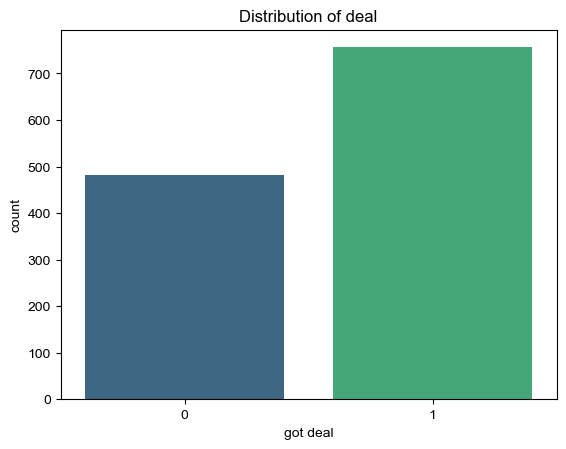

In [54]:
# plot distribution of deals
sns.countplot(data=df, x="got_deal", palette="viridis")
sns.set(style='whitegrid', palette='Set2')
plt.xlabel("got deal")
plt.title("Distribution of deal")

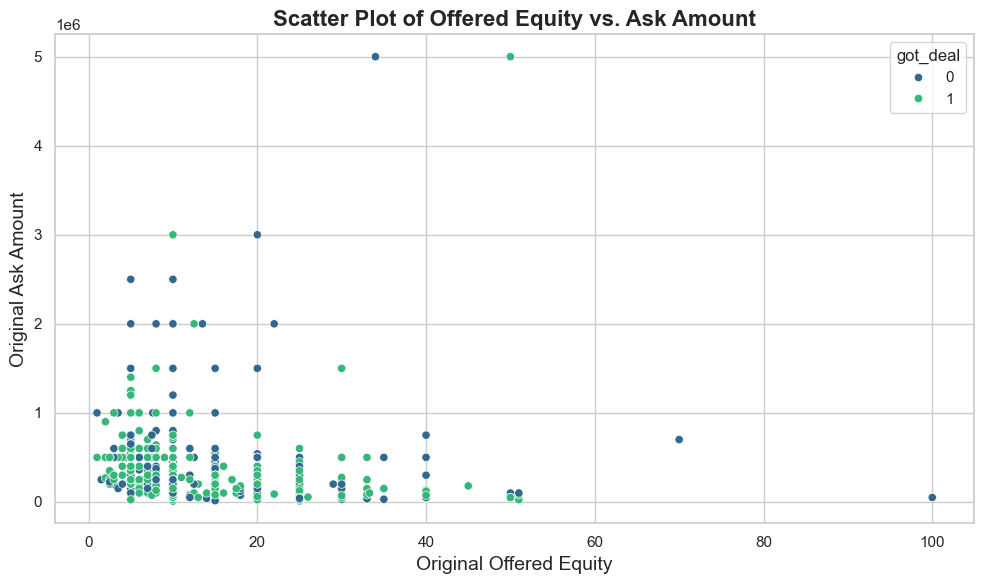

In [55]:
#Scattered plot for original_offered_equity and original_ask_amount
plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    x="original_offered_equity",
    y="original_ask_amount",
    hue="got_deal",
    data=df,
    palette="viridis"
)

plt.title("Scatter Plot of Offered Equity vs. Ask Amount", fontsize=16, fontweight='bold')
plt.xlabel("Original Offered Equity", fontsize=14)
plt.ylabel("Original Ask Amount", fontsize=14)

plt.tight_layout()
plt.show()

In [57]:
df['industry'].value_counts()

industry
Food and Beverage          268
Lifestyle/Home             213
Fashion/Beauty             210
Children/Education         117
Fitness/Sports/Outdoors    111
Health/Wellness             65
Software/Tech               63
Pet Products                51
Business Services           37
Media/Entertainment         23
Uncertain/Other             18
Automotive                  17
Electronics                 15
Green/CleanTech             11
Travel                      11
Liquor/Alcohol               8
Name: count, dtype: int64

In [58]:
#Number of distinct induestries
len(df['industry'].unique())

16

In [59]:
df['original_ask_amount'].value_counts()

original_ask_amount
100000    151
150000    131
200000    131
500000    122
250000    108
         ... 
65000       1
48000       1
57000       1
540000      1
14000       1
Name: count, Length: 78, dtype: int64

In [60]:
#Number of distinct original ask amount
len(df['original_ask_amount'].unique())

78

In [61]:
df['total_deal_amount'].value_counts()

total_deal_amount
0.0         482
100000.0     96
200000.0     84
150000.0     80
500000.0     69
           ... 
460000.0      1
87500.0       1
30000.0       1
54000.0       1
130000.0      1
Name: count, Length: 70, dtype: int64

In [62]:
#Number of distinct original ask amount
len(df['total_deal_amount'].unique())

70

In [63]:
#Total number of entries for got deal per industry
group_industry = df.groupby('industry')['got_deal'].count().sort_values(ascending=False)
group_industry

industry
Food and Beverage          268
Lifestyle/Home             213
Fashion/Beauty             210
Children/Education         117
Fitness/Sports/Outdoors    111
Health/Wellness             65
Software/Tech               63
Pet Products                51
Business Services           37
Media/Entertainment         23
Uncertain/Other             18
Automotive                  17
Electronics                 15
Green/CleanTech             11
Travel                      11
Liquor/Alcohol               8
Name: got_deal, dtype: int64

In [64]:
#Sum of got deals per industry
deal_counts = df.groupby('industry')['got_deal'].sum().sort_values(ascending=False)
deal_counts

industry
Food and Beverage          163
Lifestyle/Home             146
Fashion/Beauty             122
Children/Education          74
Fitness/Sports/Outdoors     68
Health/Wellness             39
Software/Tech               35
Pet Products                30
Business Services           18
Media/Entertainment         15
Automotive                  13
Uncertain/Other             12
Electronics                  6
Green/CleanTech              6
Travel                       5
Liquor/Alcohol               4
Name: got_deal, dtype: int64

In [65]:
# General Selection for categorical and numerical data
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

# Being specific
cat_from_num = num.loc[:, num.nunique() < 20] 
cat = pd.concat([cat, cat_from_num], axis=1)

#num = num.drop(columns=cat_from_num.columns)

In [66]:
#create contingency table to count each 0 and 1 value of got deal
crosstab_analysis = pd.crosstab(df['got_deal'], df['industry']).T
crosstab_analysis = crosstab_analysis.sort_values(by=1, ascending=False)  # sort by got_deal = 1
crosstab_analysis

got_deal                   0    1
industry                         
Food and Beverage        105  163
Lifestyle/Home            67  146
Fashion/Beauty            88  122
Children/Education        43   74
Fitness/Sports/Outdoors   43   68
Health/Wellness           26   39
Software/Tech             28   35
Pet Products              21   30
Business Services         19   18
Media/Entertainment        8   15
Automotive                 4   13
Uncertain/Other            6   12
Electronics                9    6
Green/CleanTech            5    6
Travel                     6    5
Liquor/Alcohol             4    4

<h3 style="color: #008080;">Statistical Tests</h3>
Conduct a Chi-square test to determine if the got_deal distribution is independent of industry.

### Hypothesis 0

**Null hypothesis (H0)**: There is no significant association between got deal and Industry. 

**Alternative hypothesis (H1)**: There is significant association between got deal and Industry. 

In [69]:
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(crosstab_analysis)
print(f"chi2_pvalue: {chi2_pvalue:.10f}")

chi2_pvalue: 0.3811747021


In [70]:
#association strength with Cramer's V
Cramer_V_amount=association(crosstab_analysis, method='cramer')

# Cramer's V
print(f"Cramer's V: {Cramer_V_amount:.2f}")

# Interpret Cremar's V
if abs(Cramer_V_amount) < 0.2:
    print("The effect size is small.")
elif abs(Cramer_V_amount) < 0.4:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cramer's V: 0.11
The effect size is small.


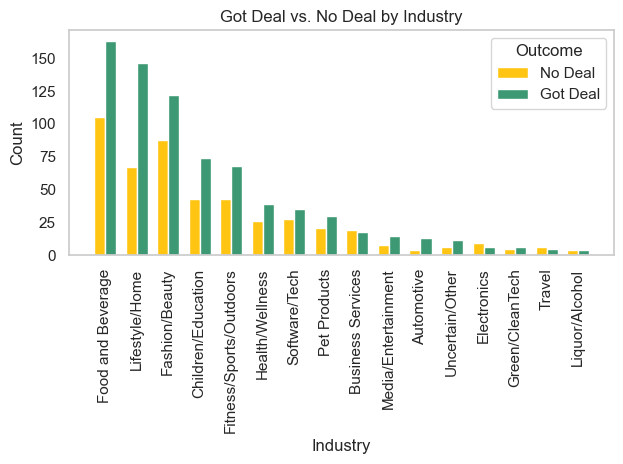

In [71]:
#Plot distribution of Got deal vs no got deal per industry
# Define industries and deal counts
industries = crosstab_analysis.index
no_deals = crosstab_analysis[0]
got_deals = crosstab_analysis[1]

bar_width = 0.35 # Bar width and positions
x = np.arange(len(industries))

# Plot bars for "No Deal"
plt.bar(x - bar_width/2, no_deals, width=bar_width, label='No Deal', color='#ffc512')

# Plot bars for "Got Deal"
plt.bar(x + bar_width/2, got_deals, width=bar_width, label='Got Deal', color='#3d9973')

plt.title('Got Deal vs. No Deal by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(x, industries, rotation=90)
plt.legend(title='Outcome')
plt.tight_layout()
plt.grid(False)
plt.show()


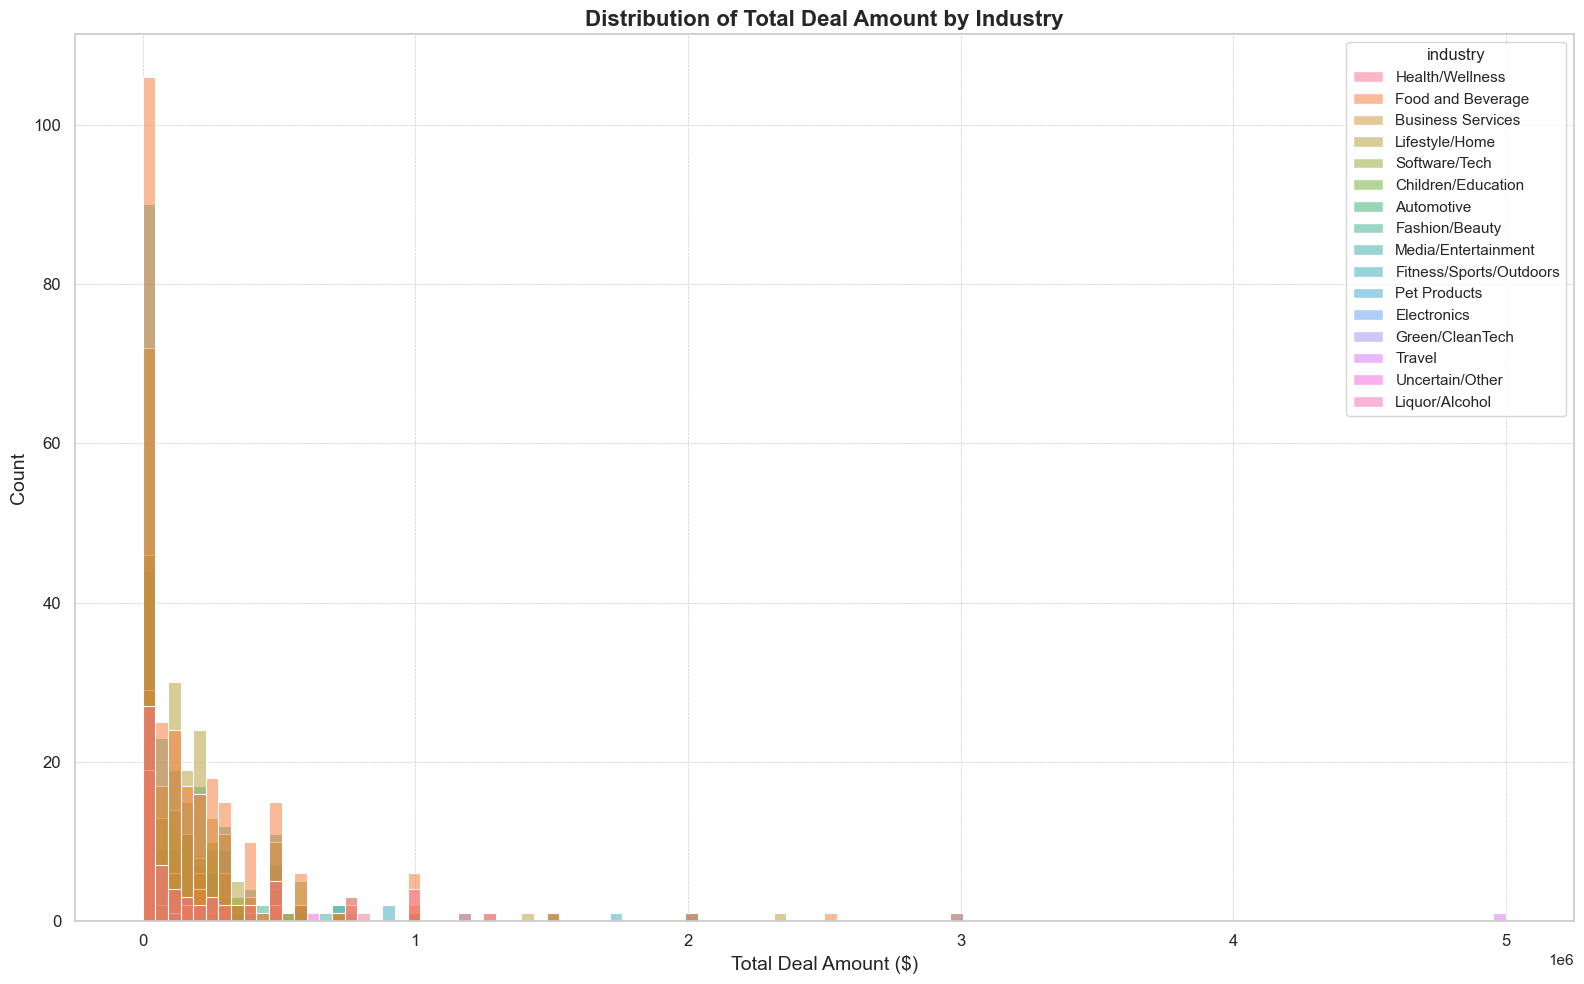

In [72]:
#Plot total deal amount by industry
plt.figure(figsize=(16, 10))
sns.histplot(data=df, x="total_deal_amount", hue='industry', color='BrBG')
plt.title('Distribution of Total Deal Amount by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Total Deal Amount ($)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [446]:
df.columns

Index(['industry', 'pitchers_city', 'pitchers_state', 'original_ask_amount',
       'original_offered_equity', 'valuation_requested', 'total_deal_amount',
       'total_deal_equity', 'deal_valuation', 'number_of_sharks_in_deal',
       'investment_amount_per_shark', 'equity_per_shark', 'got_deal',
       'gender_enc'],
      dtype='object')

In [73]:
#Total amount of deals got per industry
group_industry_deal = round(df.groupby('industry')['total_deal_amount'].mean().sort_values(ascending=False),2)
group_industry_deal

industry
Travel                     531818.18
Liquor/Alcohol             393750.00
Automotive                 321470.59
Media/Entertainment        310869.57
Health/Wellness            271769.23
Uncertain/Other            260555.56
Food and Beverage          189182.84
Fitness/Sports/Outdoors    187657.66
Business Services          183108.11
Software/Tech              177539.68
Green/CleanTech            177272.73
Lifestyle/Home             166525.82
Pet Products               141647.06
Children/Education         137792.02
Fashion/Beauty             135273.81
Electronics                110266.67
Name: total_deal_amount, dtype: float64

In [74]:
group_industry_mode = df.groupby('industry')['total_deal_amount'].apply(lambda x: x.mode().iloc[0]).sort_values(ascending=False)
group_industry_mode

industry
Automotive                 0.0
Business Services          0.0
Children/Education         0.0
Electronics                0.0
Fashion/Beauty             0.0
Fitness/Sports/Outdoors    0.0
Food and Beverage          0.0
Green/CleanTech            0.0
Health/Wellness            0.0
Lifestyle/Home             0.0
Liquor/Alcohol             0.0
Media/Entertainment        0.0
Pet Products               0.0
Software/Tech              0.0
Travel                     0.0
Uncertain/Other            0.0
Name: total_deal_amount, dtype: float64

In [75]:
#Total number of entries for got deal per industry
group_city = df.groupby('pitchers_city')['got_deal'].sum().sort_values(ascending=False)
group_city

pitchers_city
Napa Valley       470
Dallas             36
New York           32
Tampa              30
Chicago            19
Orem               16
Atlanta            14
Pueblo             13
Philadelphia       12
Dayton             11
Somerset           11
Kent                9
Cary                9
Flagstaff           8
Boston              7
Eugene              7
Kansas City         6
Hamden              4
Waterford           4
Alexandria          4
Franklin            3
Las Vegas           3
Charleston          3
Egg Harbor          2
West Greenwich      2
Ashdown             2
Broken Arrow        2
Columbia            2
Madison             2
Louisville          2
Manchester          1
Dothan              1
Overland Park       1
Lafayette           1
St. Paul            1
Bloomfield          1
Waitsfield          1
Washington          1
Ketchum             1
Ames                1
Wilmington          1
Cordova             0
Omaha               0
Bozeman             0
Name: got_deal, dt

In [76]:
filtered_city = group_city[group_city > 10]
filtered_city

pitchers_city
Napa Valley     470
Dallas           36
New York         32
Tampa            30
Chicago          19
Orem             16
Atlanta          14
Pueblo           13
Philadelphia     12
Dayton           11
Somerset         11
Name: got_deal, dtype: int64

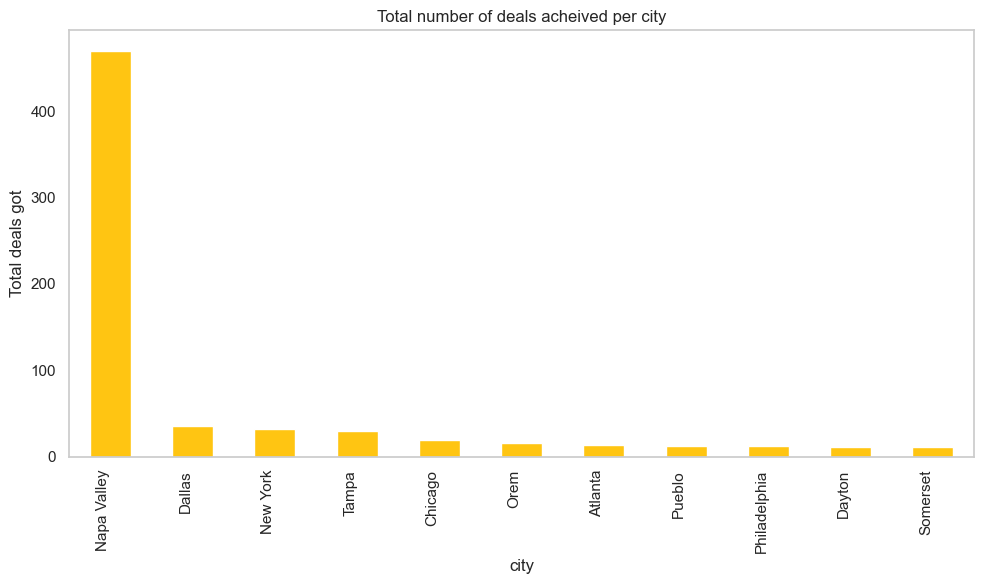

In [77]:
#bar plot for total number of deals per city
plt.figure(figsize=(10, 6))
filtered_city.plot(kind='bar', color='#ffc512')

plt.title('Total number of deals acheived per city')
plt.xlabel('city')
plt.ylabel('Total deals got')
plt.grid(False)
plt.xticks(rotation=90, ha="right") 
plt.tight_layout() 
plt.show()

In [78]:
#Total number of entries for got deal per industry
group_state = df.groupby('pitchers_state')['got_deal'].sum().sort_values(ascending=False)
group_state

pitchers_state
CA    469
TX     36
NY     32
FL     30
IL     19
UT     16
GA     14
CO     13
PA     12
OH     11
NJ     11
WA      9
NC      9
AZ      8
OR      7
MA      7
MO      6
MI      4
VA      4
CT      4
TN      3
NV      3
SC      3
MD      2
RI      2
MS      2
KY      2
OK      2
AR      2
WI      2
VT      1
MN      1
NH      1
AL      1
LA      1
KS      1
IN      1
ID      1
IA      1
HI      1
DE      1
DC      1
NE      0
MT      0
AK      0
Name: got_deal, dtype: int64

In [79]:
filtered_state = group_state[group_state > 10]
filtered_state

pitchers_state
CA    469
TX     36
NY     32
FL     30
IL     19
UT     16
GA     14
CO     13
PA     12
OH     11
NJ     11
Name: got_deal, dtype: int64

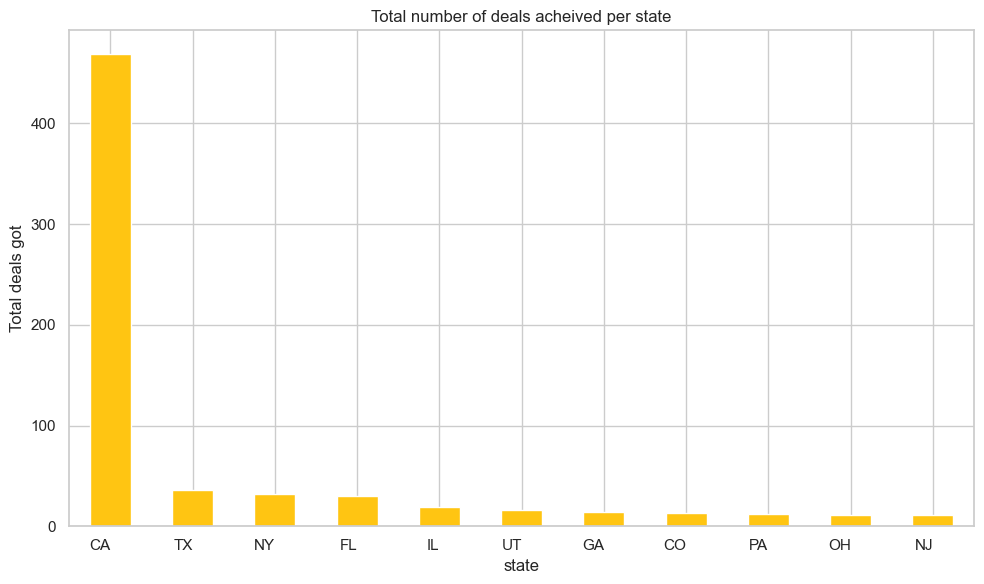

In [80]:
#Plot total number of deals acheived per state
plt.figure(figsize=(10, 6))
filtered_state.plot(kind='bar', color='#ffc512')

plt.title('Total number of deals acheived per state')
plt.xlabel('state')
plt.ylabel('Total deals got')

plt.xticks(rotation=0, ha="right") 
plt.tight_layout() 
plt.show()

<h2 style="color: #008080;">Hypotheses testing</h2>

### Hypothesis 1

**Null hypothesis (H0)**: The mean of original amount asked by entreprenuer is equal to the total_deal_amount. 

**Alternative hypothesis (H1)**: The mean of original amount asked by entreprenuer is not equal to the total_deal_amount. 

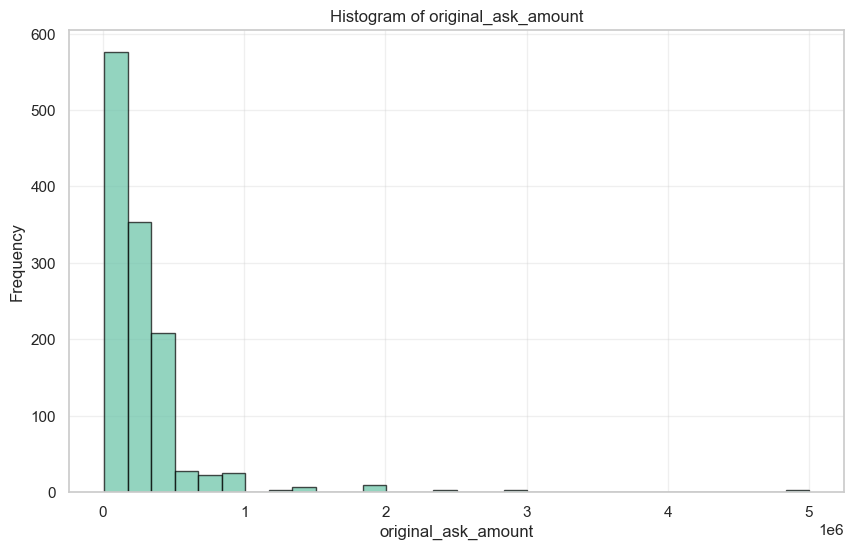

In [83]:
#checking distribution for the variables to select the parameter or non-parameter tests
#Plot histogram for better visulaization of normal distribution
plt.figure(figsize=(10, 6))
plt.hist(df['original_ask_amount'], bins=30, edgecolor="black", alpha=0.7)

plt.title("Histogram of original_ask_amount")
plt.xlabel("original_ask_amount")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

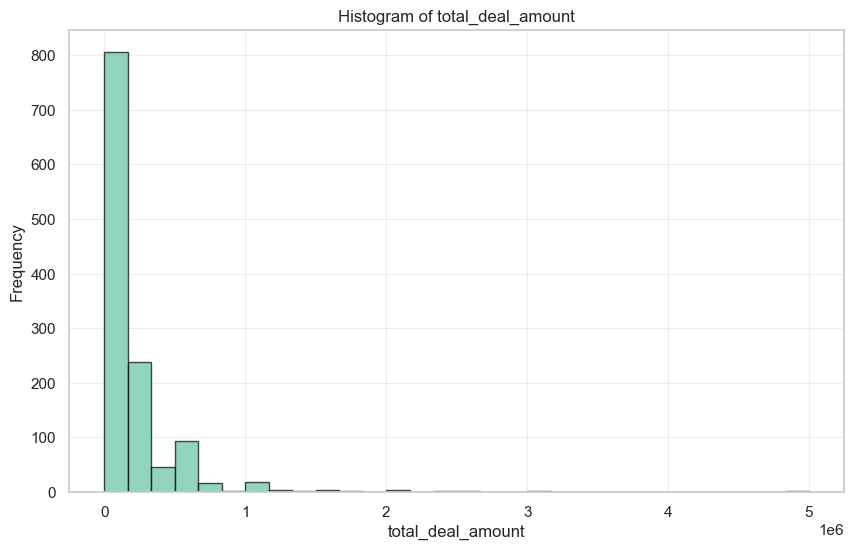

In [84]:
#checking distribution for the varaibles to select the parameter or non-parameter tests
#Plot histogram for better visulaization of normal distribution
plt.figure(figsize=(10, 6))
plt.hist(df['total_deal_amount'], bins=30, edgecolor="black", alpha=0.7)

plt.title("Histogram of total_deal_amount")
plt.xlabel("total_deal_amount")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

In [85]:
#dropping nan in total deal amount
df_cleaned_amount = df.dropna(subset=['original_ask_amount', 'total_deal_amount'])

# Define the paired samples
original_ask_amount = df_cleaned_amount['original_ask_amount']
total_deal_amount = df_cleaned_amount['total_deal_amount']

# Perform the Wilcoxon Signed-Rank Test for non parametric distibution, two sided t test 
statistic, p_value = stats.wilcoxon(original_ask_amount, total_deal_amount, alternative='two-sided')

# results
print(f"Wilcoxon Signed-Rank Test Statistic: {statistic:.2f}")
print(f"P-Value: {p_value:.60f}")
print()

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference between the paired samples of original_ask_amount and total_deal_amount.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference between the paired samples of original_ask_amount, total_deal_amount.")

Wilcoxon Signed-Rank Test Statistic: 29237.00
P-Value: 0.000000000000000000000000000000000000000000000000001042428807

Reject the null hypothesis (H0): There is a significant difference between the paired samples of original_ask_amount and total_deal_amount.


### Effect size
calculating Cohen's d to understand the magnitude or significance of P value

In [87]:
# Calculate the differences
differences_amount = original_ask_amount - total_deal_amount

# Calculate Cohen's d
mean_diff_amount = differences_amount.mean()
std_diff_amount = differences_amount.std(ddof=1)  #'ddof=1' for sample std
cohens_d_amount = mean_diff_amount / std_diff_amount

# Cohen's d
print(f"Cohen's d: {cohens_d_amount:.2f}")

# Interpret Cohen's d
if abs(cohens_d_amount) < 0.2:
    print("The effect size is small.")
elif abs(cohens_d_amount) < 0.5:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cohen's d: 0.30
The effect size is medium.


### Pearson correlation

In [89]:
correlation_amount = df[['original_ask_amount', 'total_deal_amount']].corr(method='pearson')
correlation_amount

original_ask_amount  total_deal_amount
original_ask_amount             1.000000           0.493542
total_deal_amount               0.493542           1.000000

### Spearman Correlation

In [91]:
spearman_correlation_amount = df[['original_ask_amount', 'total_deal_amount']].corr(method='spearman')
spearman_correlation_amount

original_ask_amount  total_deal_amount
original_ask_amount             1.000000           0.323136
total_deal_amount               0.323136           1.000000

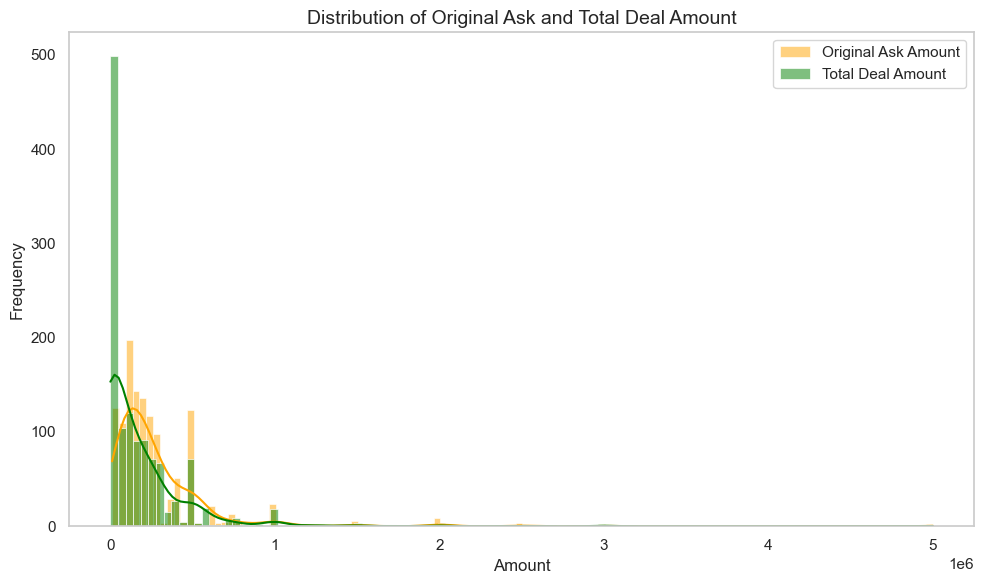

In [92]:
# Plot the distributions original_ask_amount and total_deal_amount
plt.figure(figsize=(10, 6))  
sns.histplot(df["original_ask_amount"], color="orange", kde=True, label='Original Ask Amount')
sns.histplot(df["total_deal_amount"], color="green", kde=True, label='Total Deal Amount')

plt.title("Distribution of Original Ask and Total Deal Amount", fontsize=14)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(False)
plt.tight_layout()  
plt.show()

### Hypothesis 2
**Null hypothesis (H0)**: The mean of original_offered_equity by entrepreneur is less than and equal the total_deal_equity.

**Alternative hypothesis (H1)**: The mean of original_offered_equity by entrepreneur is greater than the total_deal_equity.

In [94]:
# dropping nans in total_deal_equity
df_cleaned_equity = df.dropna(subset=['total_deal_equity', 'original_offered_equity'])

# Define the paired samples
original_equity = df_cleaned_equity['original_offered_equity']
total_deal_equity = df_cleaned_equity['total_deal_equity']

# Perform the Wilcoxon Signed-Rank Test, one tail t test for non paramteric distribution 
statistic, p_value = stats.wilcoxon(original_equity, total_deal_equity, alternative='less')

# results
print(f"Wilcoxon Signed-Rank Test Statistic: {statistic:.2f}")
print(f"P-Value: {p_value:.10f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): The mean of original_offered_equity by entreprenuer is greater than the total_deal_equity.")
else:
    print("Fail to reject the null hypothesis (H0), meaning The mean of original_offered_equity by entreprenuer is less than and equal the total_deal_equity.")

Wilcoxon Signed-Rank Test Statistic: 314897.00
P-Value: 0.1098352009
Fail to reject the null hypothesis (H0), meaning The mean of original_offered_equity by entreprenuer is less than and equal the total_deal_equity.


### Effect size
calculating Cohen's d to understand the magnitude or significance of P value

In [96]:
# Calculate the differences
differences_equity = original_equity - total_deal_equity

# Calculate Cohen's d
mean_diff_equity = differences_equity.mean()
std_diff_equity = differences_equity.std(ddof=1)  #'ddof=1' for sample std
cohens_d_equity = mean_diff_equity / std_diff_equity

# Cohen's d
print(f"Cohen's d: {cohens_d_equity:.2f}")

# Interpret Cohen's d
if abs(cohens_d_equity) < 0.2:
    print("The effect size is small.")
elif abs(cohens_d_equity) < 0.5:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cohen's d: -0.06
The effect size is small.


### Pearson correlation

In [98]:
correlation_equity = df[['original_offered_equity', 'total_deal_equity']].corr(method='pearson')
correlation_equity

original_offered_equity  total_deal_equity
original_offered_equity                 1.000000           0.231099
total_deal_equity                       0.231099           1.000000

### Spearman Correlation

In [100]:
spearman_correlation_equity = df[['original_offered_equity', 'total_deal_equity']].corr(method='spearman')
spearman_correlation_equity

original_offered_equity  total_deal_equity
original_offered_equity                 1.000000           0.161181
total_deal_equity                       0.161181           1.000000

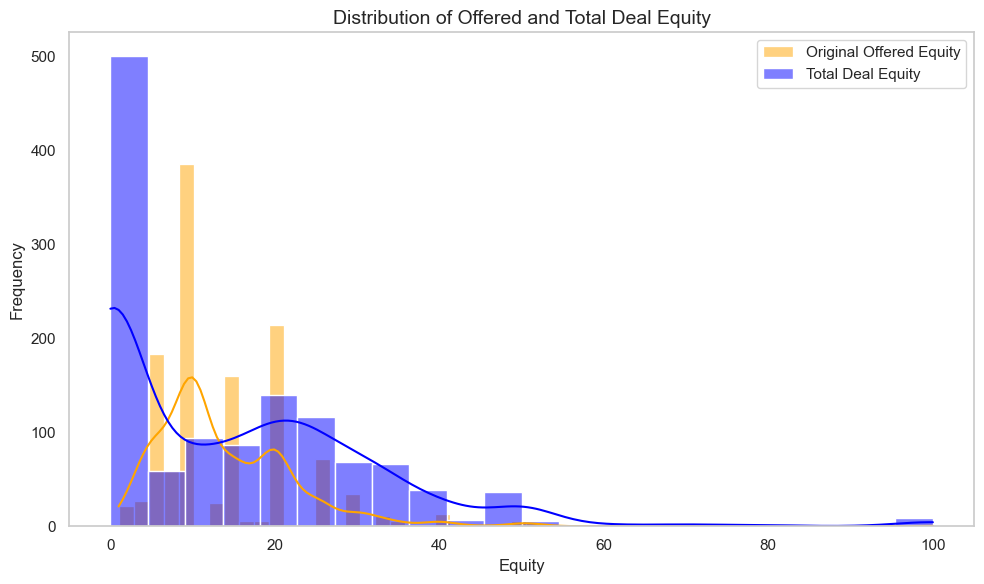

In [101]:
# Plot the distributions of Original Offered Equity and Total Deal Equity
plt.figure(figsize=(10, 6))  
sns.histplot(df["original_offered_equity"], color="orange", kde=True, label='Original Offered Equity')
sns.histplot(df["total_deal_equity"], color="blue", kde=True, label='Total Deal Equity')

plt.title("Distribution of Offered and Total Deal Equity", fontsize=14)
plt.xlabel("Equity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(False)
plt.tight_layout() 
plt.show()

In [102]:
df.isnull().sum()

industry                       0
pitchers_gender                0
pitchers_city                  0
pitchers_state                 0
original_ask_amount            0
original_offered_equity        0
valuation_requested            0
total_deal_amount              0
total_deal_equity              0
deal_valuation                 0
number_of_sharks_in_deal       0
investment_amount_per_shark    0
equity_per_shark               0
got_deal                       0
dtype: int64

In [103]:
df.columns

Index(['industry', 'pitchers_gender', 'pitchers_city', 'pitchers_state',
       'original_ask_amount', 'original_offered_equity', 'valuation_requested',
       'total_deal_amount', 'total_deal_equity', 'deal_valuation',
       'number_of_sharks_in_deal', 'investment_amount_per_shark',
       'equity_per_shark', 'got_deal'],
      dtype='object')

<h3 style="color: #008080;">Selecting numerical</h3>

In [105]:
# selecting only numberical features 
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head()

original_ask_amount  original_offered_equity  valuation_requested  \
0                50000                     15.0               333333   
1               460000                     10.0              4600000   
2              1200000                     10.0             12000000   
3               250000                     25.0              1000000   
4              1000000                     15.0              6666667   

   total_deal_amount  total_deal_equity  deal_valuation  \
0            50000.0               55.0         90909.0   
1           460000.0               50.0        920000.0   
2                0.0                0.0             0.0   
3                0.0                0.0             0.0   
4                0.0                0.0             0.0   

   number_of_sharks_in_deal  investment_amount_per_shark  equity_per_shark  \
0                       1.0                      50000.0              55.0   
1                       2.0                     230000.0              25.0   
2                       0.0                          0.0               0.0   
3                       0.0                          0.0               0.0   
4                       0.0                          0.0               0.0   

   got_deal  
0         1  
1         1  
2         0  
3         0  
4         0

<h2 style="color: #008080;">Checking Distributions</h2>

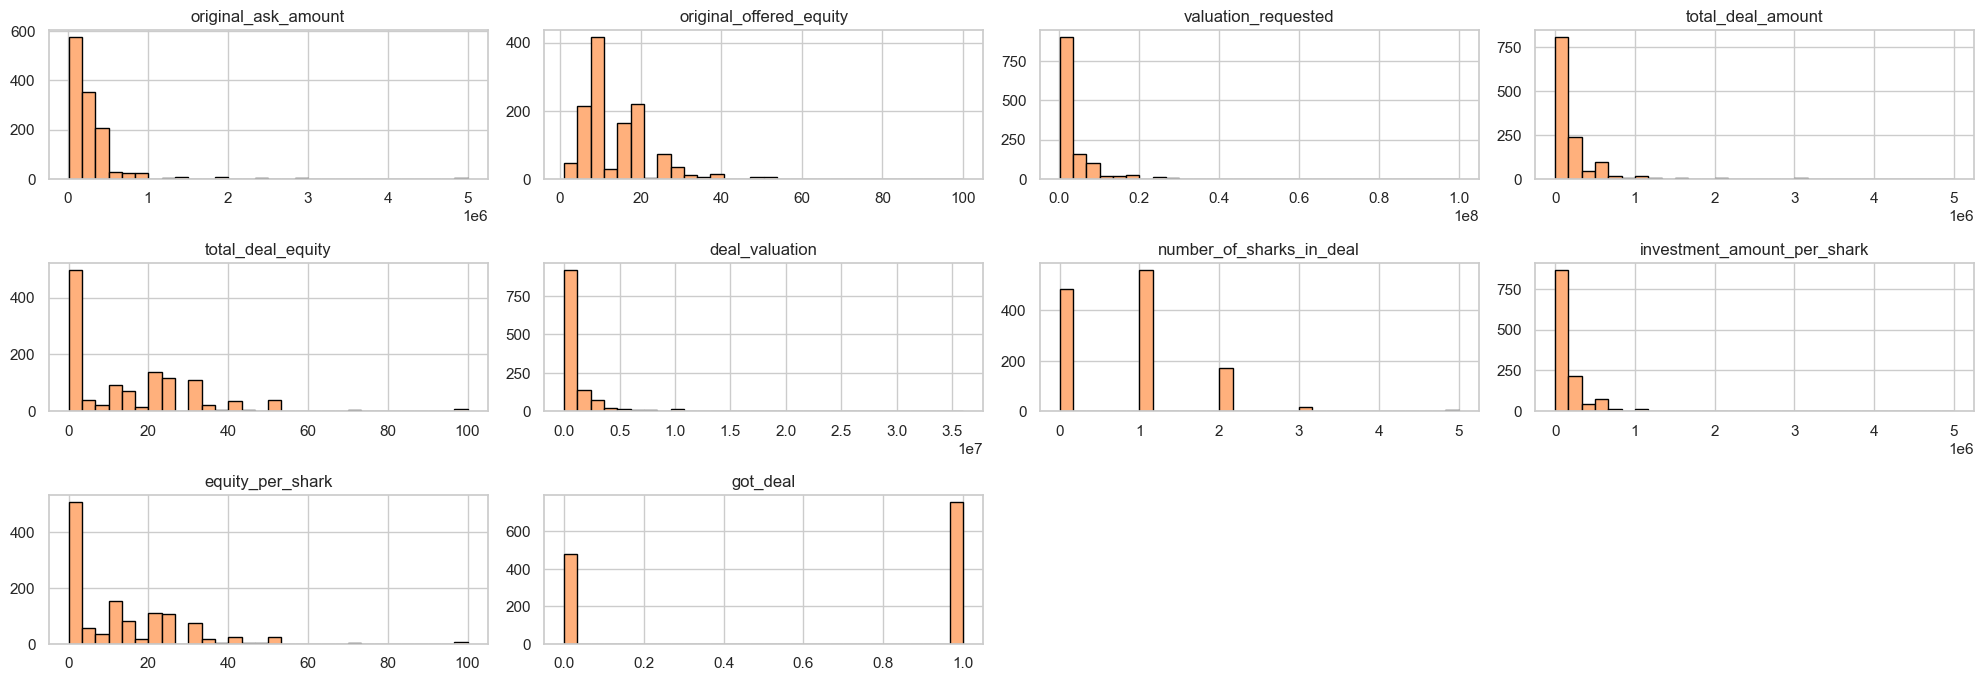

In [107]:
color = '#ffb07c'

# grid size 
nrows, ncols = 7, 4  
grid_size = nrows * ncols

# Create a figure and axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

# Flatten the 2D array of axes to 1D for easy iteration
axes = axes.flatten()

# Plot feature
for i, ax in enumerate(axes):
    if i < len(numeric_df.columns):
        col = numeric_df.columns[i]
        ax.hist(numeric_df[col].dropna(), bins=30, color=color, edgecolor='black')
        ax.set_title(col)
    else:
        ax.set_visible(False)  # Hide unused plots

plt.tight_layout()
plt.show()

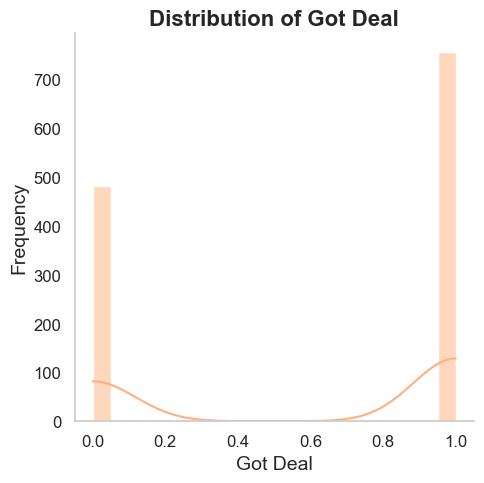

In [108]:
#Plot distibution of got deal
sns.set(style='whitegrid', rc={'figure.figsize':(12, 8)})

# Create the distribution plot with Kernel Density Estimate (KDE)
plot = sns.displot(
    data=df, 
    x='got_deal', 
    bins=20, 
    color=color, 
    kde=True,
    height=5,  # Setting height of the plot
    aspect=1  # Aspect ratio for width/height
)

plt.title('Distribution of Got Deal', fontsize=16, fontweight='bold')
plt.xlabel('Got Deal', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)  # Optional: turning off the grid for a cleaner look
plt.tight_layout()
plt.show()

<h2 style="color: #008080;">Checking Outliers</h2>

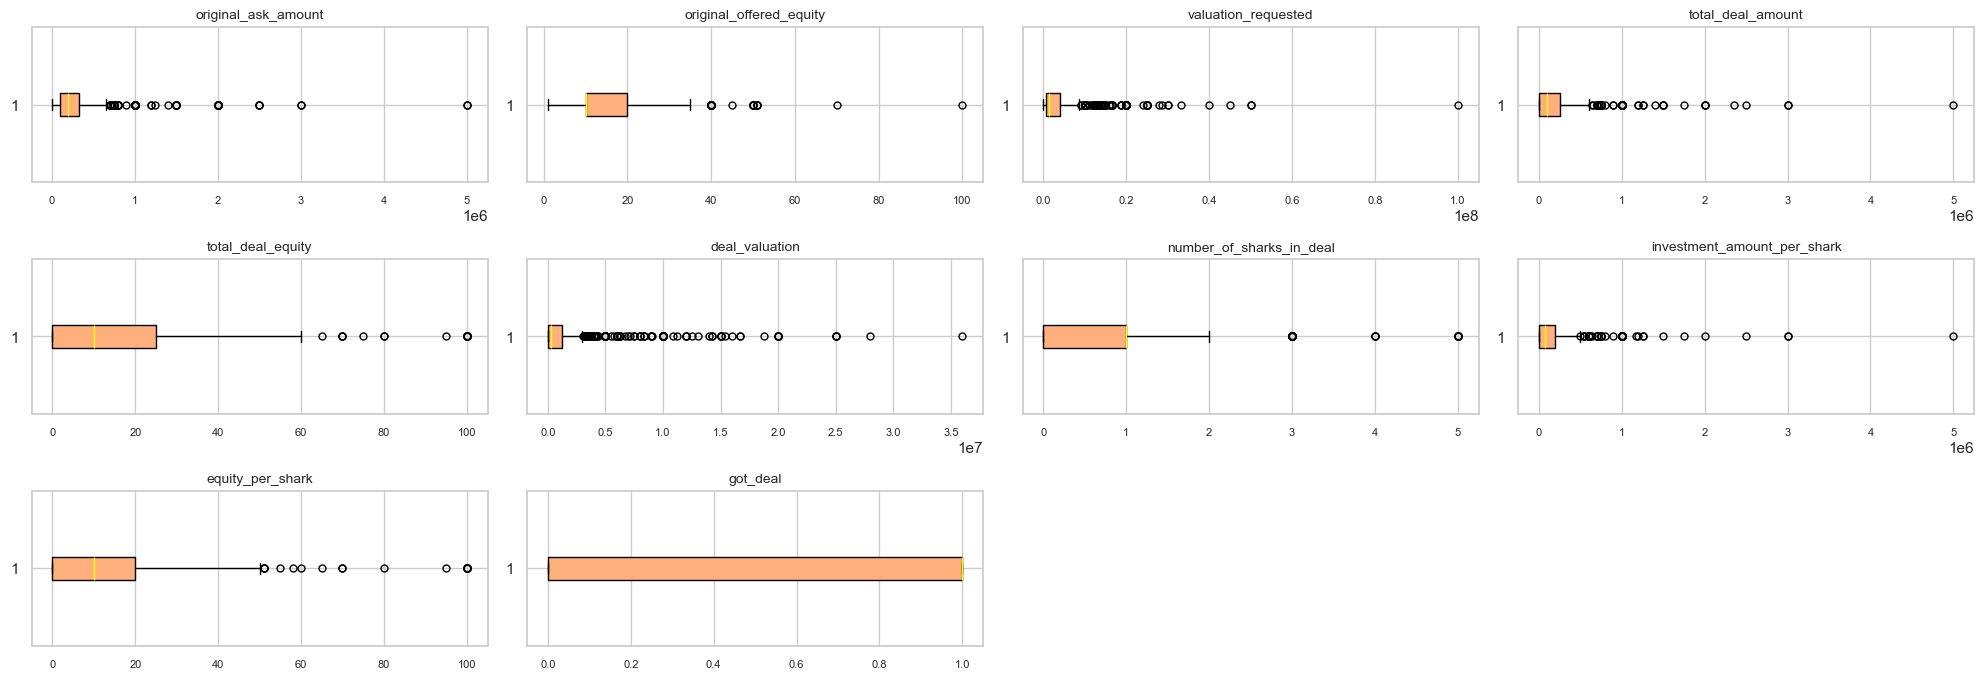

In [110]:
color = '#ffb07c'

numeric_df = df.select_dtypes(include=[np.number])

# Set up a grid size for subplots
nrows, ncols = 7, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Iterate through numeric columns and plot
for i, ax in enumerate(axes):
    if i >= len(numeric_df.columns):
        ax.set_visible(False)
        continue
    # Drop NaNs and ensure data is float for compatibility
    data_to_plot = numeric_df.iloc[:, i].dropna().astype(float)
    
    ax.boxplot(data_to_plot, vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', 
               color='red', markersize=5))
    ax.set_title(numeric_df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [111]:
# Dealing with outliers
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

<h2 style="color: #008080;">Looking for Correlations</h2>

In [113]:
df['got_deal'] = pd.to_numeric(df['got_deal'], errors='coerce')
df.dropna(subset=['got_deal'], inplace=True)

In [114]:
num.corr()["got_deal"].sort_values(ascending=False)

got_deal                       1.000000
number_of_sharks_in_deal       0.799467
total_deal_equity              0.698889
equity_per_shark               0.660498
total_deal_amount              0.456881
investment_amount_per_shark    0.430003
deal_valuation                 0.339109
valuation_requested           -0.028472
original_ask_amount           -0.070316
original_offered_equity       -0.115558
Name: got_deal, dtype: float64

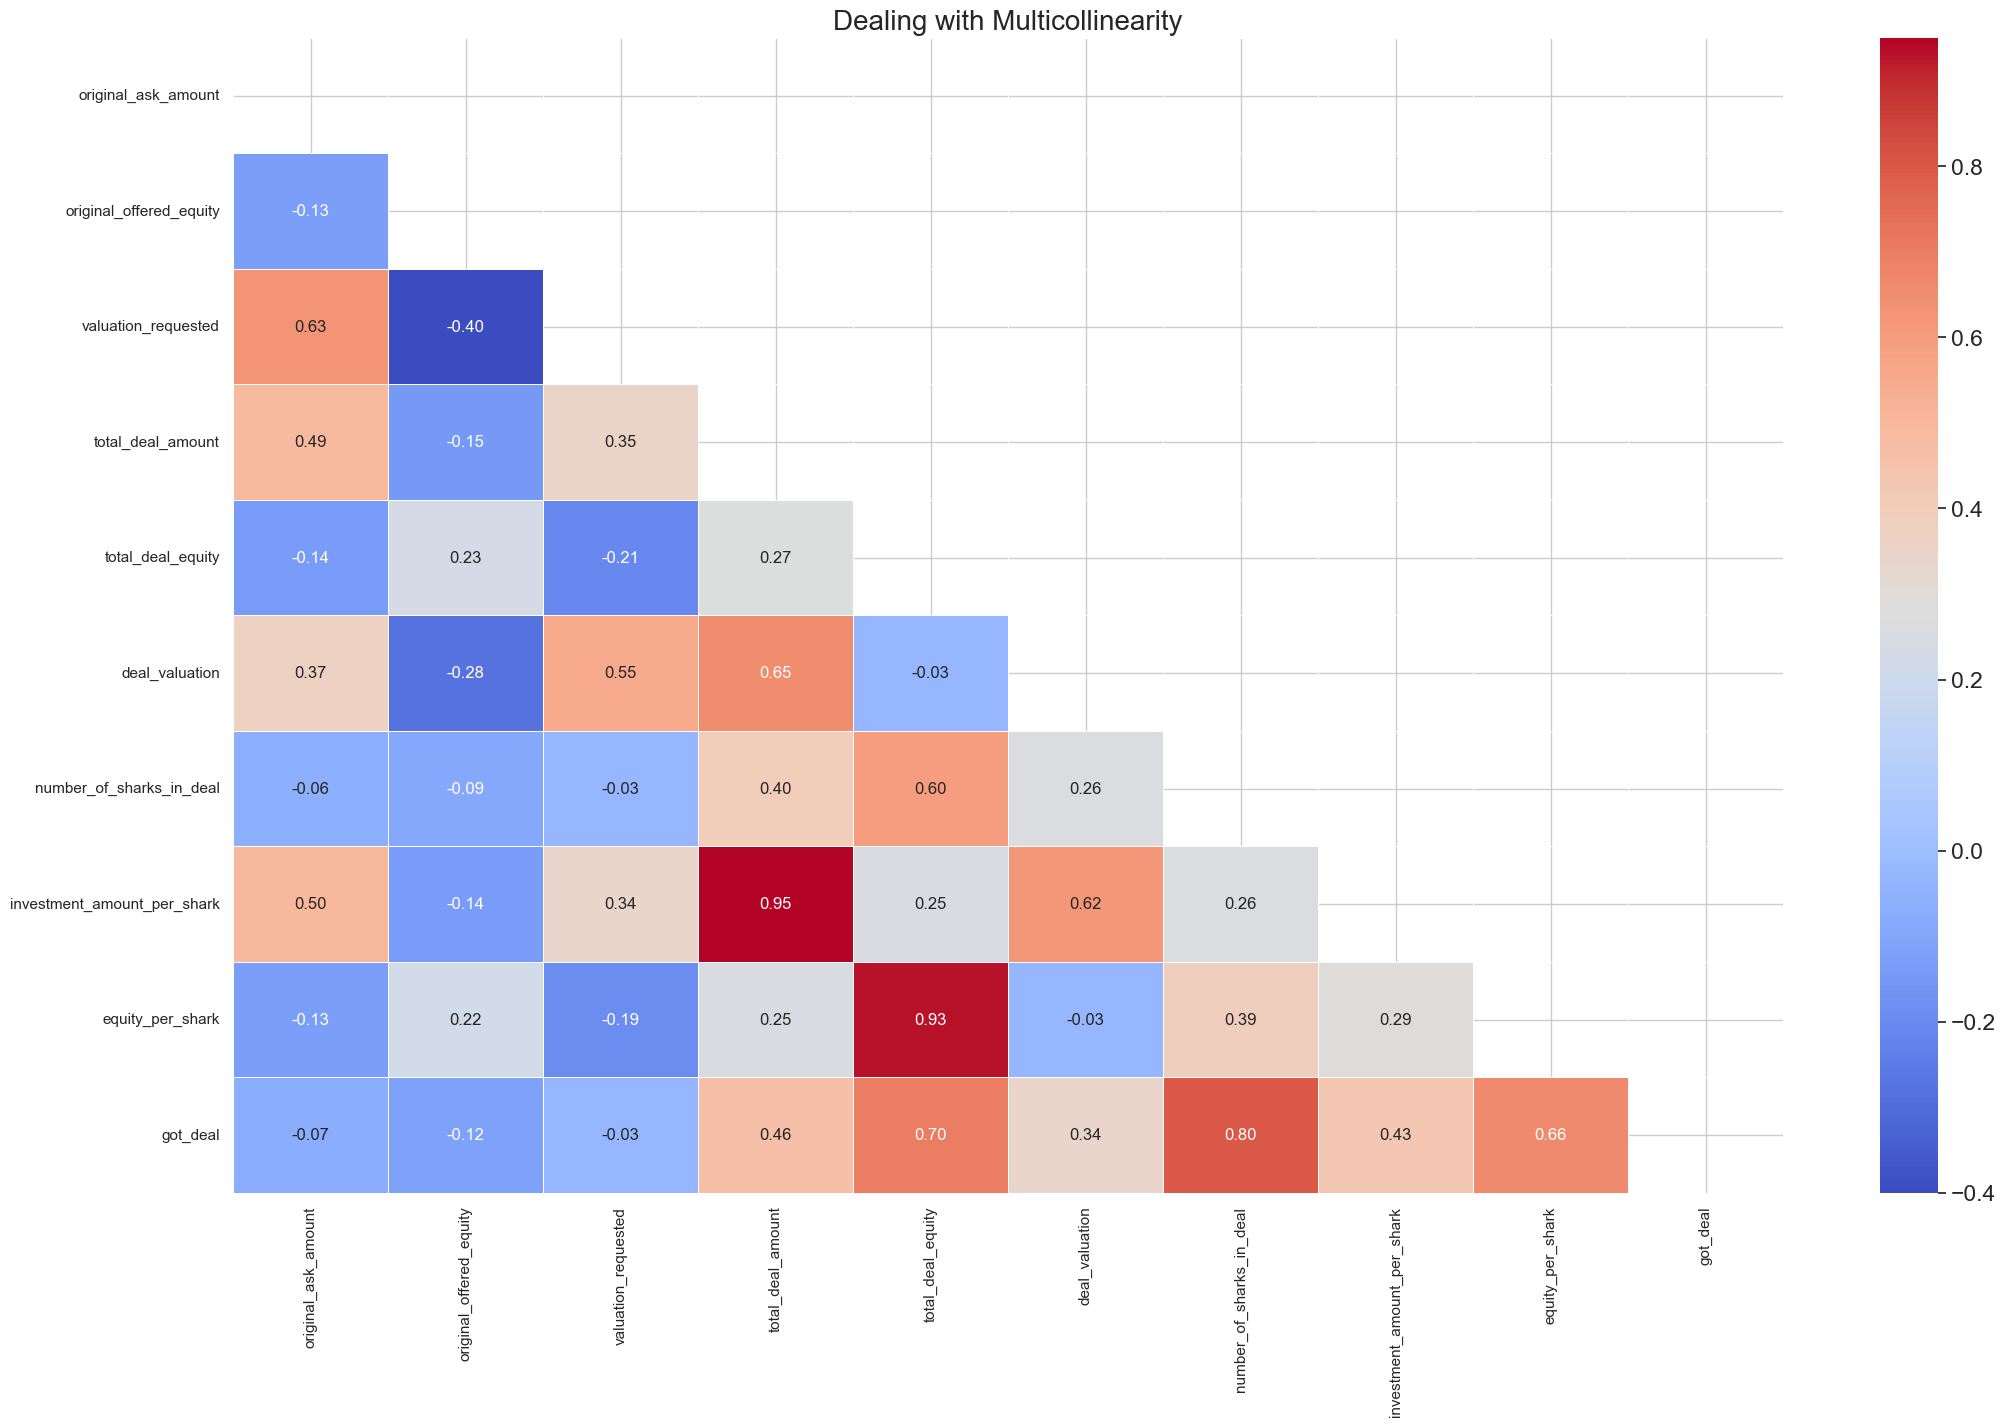

In [115]:
#Plot Correlation matrix
num_corr = num.corr().round(2)

# Create the mask and plot heatmap
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True  # to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5)  # Increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12},
                 linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) 
ax.set_title("Dealing with Multicollinearity", fontsize=20) 
plt.show()

**multiculiniarity between featurtes:**


total_deal_amount and investment_amount_per_shark 0.95

total_deal_equity and equity_per_shark 0.93

deal_valuation and total_deal_amount 0.65

original_offered_equity and valuation_requested -0.40

original_offered_equity and deal_valuation -0.28

<h1 style="color: #ffc512;">04 | Data Processing</h1>

<h2 style="color: #008080;">X-Y Split</h2>

In [119]:
X = df.drop('got_deal', axis=1)
y = df.got_deal

In [120]:
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
non_numeric_cols

Index(['industry', 'pitchers_gender', 'pitchers_city', 'pitchers_state'], dtype='object')

In [121]:
# One-hot encode non-numeric columns

df_encoded = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True, dtype=int)

# Validate the changes
df_encoded.head()

original_ask_amount  original_offered_equity  valuation_requested  \
0                50000                     15.0               333333   
1               460000                     10.0              4600000   
2              1200000                     10.0             12000000   
3               250000                     25.0              1000000   
4              1000000                     15.0              6666667   

   total_deal_amount  total_deal_equity  deal_valuation  \
0            50000.0               55.0         90909.0   
1           460000.0               50.0        920000.0   
2                0.0                0.0             0.0   
3                0.0                0.0             0.0   
4                0.0                0.0             0.0   

   number_of_sharks_in_deal  investment_amount_per_shark  equity_per_shark  \
0                       1.0                      50000.0              55.0   
1                       2.0                     230000.0              25.0   
2                       0.0                          0.0               0.0   
3                       0.0                          0.0               0.0   
4                       0.0                          0.0               0.0   

   industry_Business Services  industry_Children/Education  \
0                           0                            0   
1                           0                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   industry_Electronics  industry_Fashion/Beauty  \
0                     0                        0   
1                     0                        0   
2                     0                        0   
3                     0                        0   
4                     0                        0   

   industry_Fitness/Sports/Outdoors  industry_Food and Beverage  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   industry_Green/CleanTech  industry_Health/Wellness  \
0                         0                         1   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   industry_Lifestyle/Home  industry_Liquor/Alcohol  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        1                        0   
4                        0                        0   

   industry_Media/Entertainment  industry_Pet Products  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   

   industry_Software/Tech  industry_Travel  industry_Uncertain/Other  \
0                       0                0                         0   
1                       0                0                         0   
2                       0                0                         0   
3                       0                0                         0   
4                       1                0                         0   

   pitchers_gender_Male  pitchers_gender_Mixed Team  pitchers_city_Ames  \
0                     0                           0                   0   
1                     1                           0

In [122]:
X

industry pitchers_gender pitchers_city pitchers_state  \
0       Health/Wellness          Female       Atlanta             GA   
1     Food and Beverage            Male      Somerset             NJ   
2     Business Services            Male          Cary             NC   
3        Lifestyle/Home            Male         Tampa             FL   
4         Software/Tech            Male      St. Paul             MN   
...                 ...             ...           ...            ...   
1268     Fashion/Beauty          Female   Napa Valley             CA   
1269  Food and Beverage            Male   Napa Valley             CA   
1270     Fashion/Beauty          Female   Napa Valley             CA   
1272     Lifestyle/Home            Male   Napa Valley             CA   
1273     Fashion/Beauty          Female   Napa Valley             CA   

      original_ask_amount  original_offered_equity  valuation_requested  \
0                   50000                     15.0               333333   
1                  460000                     10.0              4600000   
2                 1200000                     10.0             12000000   
3                  250000                     25.0              1000000   
4                 1000000                     15.0              6666667   
...                   ...                      ...                  ...   
1268               250000                     10.0              2500000   
1269               250000                     17.0              1470588   
1270                70000                     30.0               233333   
1272                25000                      5.0               500000   
1273               300000                     15.0              2000000   

      total_deal_amount  total_deal_equity  deal_valuation  \
0               50000.0               55.0         90909.0   
1              460000.0               50.0        920000.0   
2                   0.0                0.0             0.0   
3                   0.0                0.0             0.0   
4                   0.0                0.0             0.0   
...                 ...                ...             ...   
1268                0.0                0.0             0.0   
1269           250000.0               25.0       1000000.0   
1270            70000.0               39.0        179487.0   
1272           125000.0               20.0        625000.0   
1273           300000.0               12.0       2500000.0   

      number_of_sharks_in_deal  investment_amount_per_shark  equity_per_shark  
0                          1.0                      50000.0              55.0  
1                          2.0                     230000.0              25.0  
2                          0.0                          0.0               0.0  
3                          0.0                          0.0               0.0  
4                          0.0                          0.0               0.0  
...                        ...                          ...               ...  
1268                       0.0                          0.0               0.0  
1269                       1.0                     250000.0              25.0  
1270                       1.0                      70000.0              39.0  
1272                       5.0                      25000.0               4.0  
1273                       1.0                     300000.0              12.0  

[1238 rows x 13 columns]

In [123]:
#encoding pitchers_gender
df['pitchers_gender'].value_counts()

pitchers_gender
Male          686
Female        321
Mixed Team    231
Name: count, dtype: int64

In [124]:
df["gender_enc"] = df["pitchers_gender"].map({"Female": 0, "Male": 1, "Mixed Team": 2})

In [125]:
df = df.drop(columns=["pitchers_gender"])

In [126]:
df['gender_enc'].value_counts()

gender_enc
1    686
0    321
2    231
Name: count, dtype: int64

In [127]:
#concat got_deal and gender_enc together with df_encoded to one dataframe
df_encoded = pd.concat([df_encoded, df['gender_enc'],df['got_deal']], axis=1)
df_encoded.sample(5)

original_ask_amount  original_offered_equity  valuation_requested  \
1109               150000                     20.0               750000   
1263               150000                     10.0              1500000   
654                150000                     20.0               750000   
509                100000                     20.0               500000   
1141               100000                     20.0               500000   

      total_deal_amount  total_deal_equity  deal_valuation  \
1109                0.0                0.0             0.0   
1263           150000.0               20.0        750000.0   
654            300000.0               25.0       1200000.0   
509                 0.0                0.0             0.0   
1141                0.0                0.0             0.0   

      number_of_sharks_in_deal  investment_amount_per_shark  equity_per_shark  \
1109                       0.0                          0.0               0.0   
1263                       1.0                     150000.0              20.0   
654                        1.0                     300000.0              25.0   
509                        0.0                          0.0               0.0   
1141                       0.0                          0.0               0.0   

      industry_Business Services  industry_Children/Education  \
1109                           0                            0   
1263                           0                            1   
654                            0                            0   
509                            0                            0   
1141                           0                            0   

      industry_Electronics  industry_Fashion/Beauty  \
1109                     0                        0   
1263                     0                        0   
654                      0                        0   
509                      0                        0   
1141                     0                        0   

      industry_Fitness/Sports/Outdoors  industry_Food and Beverage  \
1109                                 0                           0   
1263                                 0                           0   
654                                  1                           0   
509                                  0                           1   
1141                                 0                           0   

      industry_Green/CleanTech  industry_Health/Wellness  \
1109                         0                         0   
1263                         0                         0   
654                          0                         0   
509                          0                         0   
1141                         0                         1   

      industry_Lifestyle/Home  industry_Liquor/Alcohol  \
1109                        0                        0   
1263                        0                        0   
654                         0                        0   
509                         0                        0   
1141                        0                        0   

      industry_Media/Entertainment  industry_Pet Products  \
1109                             0                      0   
1263                             0                      0   
654                              0                      0   
509                              0                      0   
1141                             0                      0   

      industry_Software/Tech  industry_Travel  industry_Uncertain/Other  \
1109                       1                0                         0   
1263                       0                0                         0   
654                        0                0                         0   
509                        0                0                         0   
1141                       0                0                         0   

      pitchers_gender_Ma

In [128]:
df_encoded.columns = [col.lower().replace(' ', '_') for col in df_encoded.columns]

In [129]:
df_encoded.shape

(1238, 115)

In [130]:
df_encoded.head()

original_ask_amount  original_offered_equity  valuation_requested  \
0                50000                     15.0               333333   
1               460000                     10.0              4600000   
2              1200000                     10.0             12000000   
3               250000                     25.0              1000000   
4              1000000                     15.0              6666667   

   total_deal_amount  total_deal_equity  deal_valuation  \
0            50000.0               55.0         90909.0   
1           460000.0               50.0        920000.0   
2                0.0                0.0             0.0   
3                0.0                0.0             0.0   
4                0.0                0.0             0.0   

   number_of_sharks_in_deal  investment_amount_per_shark  equity_per_shark  \
0                       1.0                      50000.0              55.0   
1                       2.0                     230000.0              25.0   
2                       0.0                          0.0               0.0   
3                       0.0                          0.0               0.0   
4                       0.0                          0.0               0.0   

   industry_business_services  industry_children/education  \
0                           0                            0   
1                           0                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   industry_electronics  industry_fashion/beauty  \
0                     0                        0   
1                     0                        0   
2                     0                        0   
3                     0                        0   
4                     0                        0   

   industry_fitness/sports/outdoors  industry_food_and_beverage  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   industry_green/cleantech  industry_health/wellness  \
0                         0                         1   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   industry_lifestyle/home  industry_liquor/alcohol  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        1                        0   
4                        0                        0   

   industry_media/entertainment  industry_pet_products  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   

   industry_software/tech  industry_travel  industry_uncertain/other  \
0                       0                0                         0   
1                       0                0                         0   
2                       0                0                         0   
3                       0                0                         0   
4                       1                0                         0   

   pitchers_gender_male  pitchers_gender_mixed_team  pitchers_city_ames  \
0                     0                           0                   0   
1                     1                           0

<h2 style="color: #008080;">X-Y Split</h2>

In [132]:
df_encoded

original_ask_amount  original_offered_equity  valuation_requested  \
0                   50000                     15.0               333333   
1                  460000                     10.0              4600000   
2                 1200000                     10.0             12000000   
3                  250000                     25.0              1000000   
4                 1000000                     15.0              6666667   
...                   ...                      ...                  ...   
1268               250000                     10.0              2500000   
1269               250000                     17.0              1470588   
1270                70000                     30.0               233333   
1272                25000                      5.0               500000   
1273               300000                     15.0              2000000   

      total_deal_amount  total_deal_equity  deal_valuation  \
0               50000.0               55.0         90909.0   
1              460000.0               50.0        920000.0   
2                   0.0                0.0             0.0   
3                   0.0                0.0             0.0   
4                   0.0                0.0             0.0   
...                 ...                ...             ...   
1268                0.0                0.0             0.0   
1269           250000.0               25.0       1000000.0   
1270            70000.0               39.0        179487.0   
1272           125000.0               20.0        625000.0   
1273           300000.0               12.0       2500000.0   

      number_of_sharks_in_deal  investment_amount_per_shark  equity_per_shark  \
0                          1.0                      50000.0              55.0   
1                          2.0                     230000.0              25.0   
2                          0.0                          0.0               0.0   
3                          0.0                          0.0               0.0   
4                          0.0                          0.0               0.0   
...                        ...                          ...               ...   
1268                       0.0                          0.0               0.0   
1269                       1.0                     250000.0              25.0   
1270                       1.0                      70000.0              39.0   
1272                       5.0                      25000.0               4.0   
1273                       1.0                     300000.0              12.0   

      industry_business_services  industry_children/education  \
0                              0                            0   
1                              0                            0   
2                              1                            0   
3                              0                            0   
4                              0                            0   
...                          ...                          ...   
1268                           0                            0   
1269                           0                            0   
1270                           0                            0   
1272                           0                            0   
1273                           0                            0   

      industry_electronics  industry_fashion/beauty  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   
...                    ...                      ...   
1268                     0                        1   
1269                     0                        0   
1270                     0                        1   
1272                     0                        0   
1

In [133]:
X = df_encoded.drop('got_deal', axis=1)
y = df_encoded.got_deal

<h1 style="color: #ffc512;">05 | Modeling</h1>

<h2 style="color: #008080;">Train-Test Split</h2>

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2 style="color: #008080;">Model Selection: Random Forest Classifier</h2>

In [138]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<h2 style="color: #008080;">Model Validation</h2>

In [140]:
predictions = model.predict(X_test)

In [141]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



<h2 style="color: #008080;">Feature Importance</h2>

In [143]:
#checking which features has the most importance or contributing the most to the predictions using random forest 
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order
top_20_indices = indices[:20] # Select the top 20 feature indices

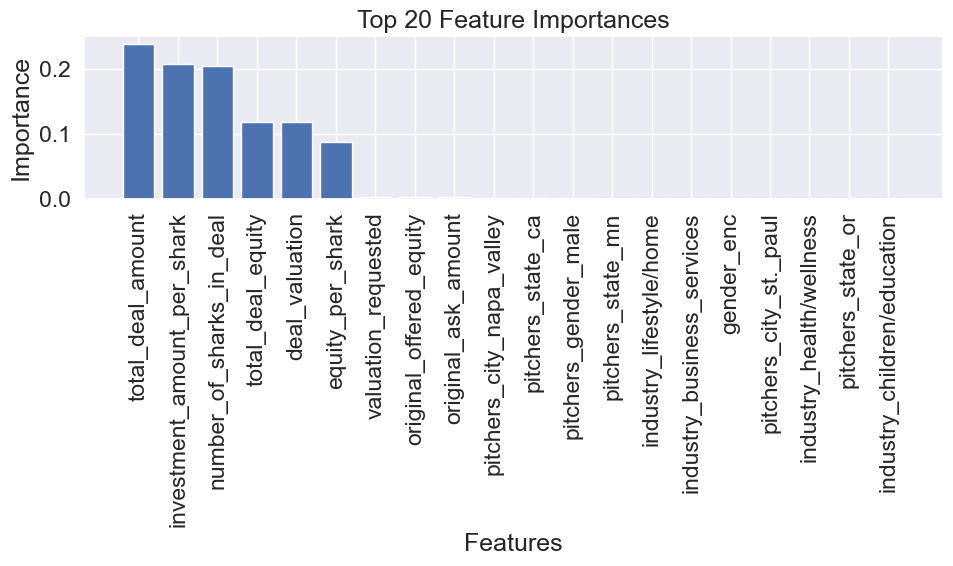

In [144]:
# Create a plot for the top 20 features
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[top_20_indices], align="center")
plt.xticks(range(20), [feature_names[i] for i in top_20_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [145]:
#checking which features has the most importance or contributing the most to the predictions using xgboost
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

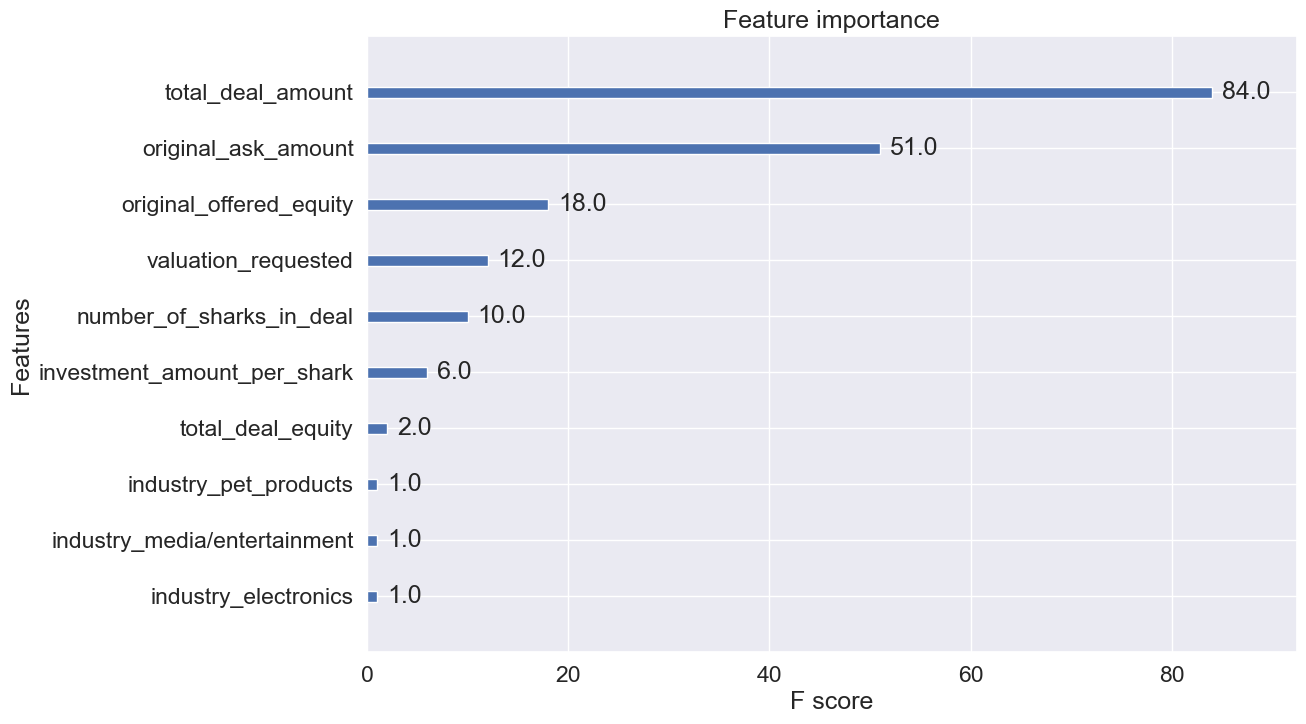

In [146]:
from xgboost import plot_importance
plot_importance(xgbr, importance_type='weight')
plt.show()

selecting feature for training based on feature importance and multiculiniarity between features

**multiculiniarity between featurtes:**

total_deal_amount and investment_amount_per_shark 0.95

total_deal_equity and equity_per_shark 0.93

deal_valuation and total_deal_amount 0.65

original_offered_equity and valuation_requested -0.40

original_offered_equity and deal_valuation -0.28


**Featurte importance**

-total_deal_amount, number_of_sharks_in_deal,investment_amount_per_shark, total_deal_equity, deal_valuation, equity_per_shark

-total_deal_amount, original_ask_amount, number_of_sharks_in_deal, original_offered_equity, valuation_requested, investment_amount_per_shark

==================================================================================================================

**feature selection:**
Dropping the features with high correlation among features only (as including features with higher contribution (feature importance) would increase overfitting the models thus they are excluded)


In [148]:
target=df_encoded.got_deal

In [149]:
X = df_encoded.drop(['got_deal','total_deal_amount','total_deal_equity','number_of_sharks_in_deal','original_ask_amount',
                     'deal_valuation','valuation_requested'], axis=1) 
y = df_encoded.got_deal

In [150]:
X

original_offered_equity  investment_amount_per_shark  equity_per_shark  \
0                        15.0                      50000.0              55.0   
1                        10.0                     230000.0              25.0   
2                        10.0                          0.0               0.0   
3                        25.0                          0.0               0.0   
4                        15.0                          0.0               0.0   
...                       ...                          ...               ...   
1268                     10.0                          0.0               0.0   
1269                     17.0                     250000.0              25.0   
1270                     30.0                      70000.0              39.0   
1272                      5.0                      25000.0               4.0   
1273                     15.0                     300000.0              12.0   

      industry_business_services  industry_children/education  \
0                              0                            0   
1                              0                            0   
2                              1                            0   
3                              0                            0   
4                              0                            0   
...                          ...                          ...   
1268                           0                            0   
1269                           0                            0   
1270                           0                            0   
1272                           0                            0   
1273                           0                            0   

      industry_electronics  industry_fashion/beauty  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   
...                    ...                      ...   
1268                     0                        1   
1269                     0                        0   
1270                     0                        1   
1272                     0                        0   
1273                     0                        1   

      industry_fitness/sports/outdoors  industry_food_and_beverage  \
0                                    0                           0   
1                                    0                           1   
2                                    0                           0   
3                                    0                           0   
4                                    0                           0   
...                                ...                         ...   
1268                                 0                           0   
1269                                 0                           1   
1270                                 0                           0   
1272                                 0                           0   
1273                                 0                           0   

      industry_green/cleantech  industry_health/wellness  \
0                            0                         1   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
1268                         0                         0   
1269                         0                         0   
1270                         0                         0   
1272                         0                         0   
1273                         0                         0   

      industry_lifestyle/home  industry_l

<h2 style="color: #008080;">Model Selection: Logistic Regression</h2>

In [152]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<h2 style="color: #008080;">Model Validation</h2>

In [154]:
predictions = model.predict(X_test)

In [155]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 372.


<h2 style="color: #008080;">Metrics</h2>

In [157]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [158]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  1.0
Train data accuracy:  1.0


<h2 style="color: #008080;">Confusion matrix</h2>

In [160]:
cm = confusion_matrix(y_test, predictions)

<Figure size 600x400 with 0 Axes>

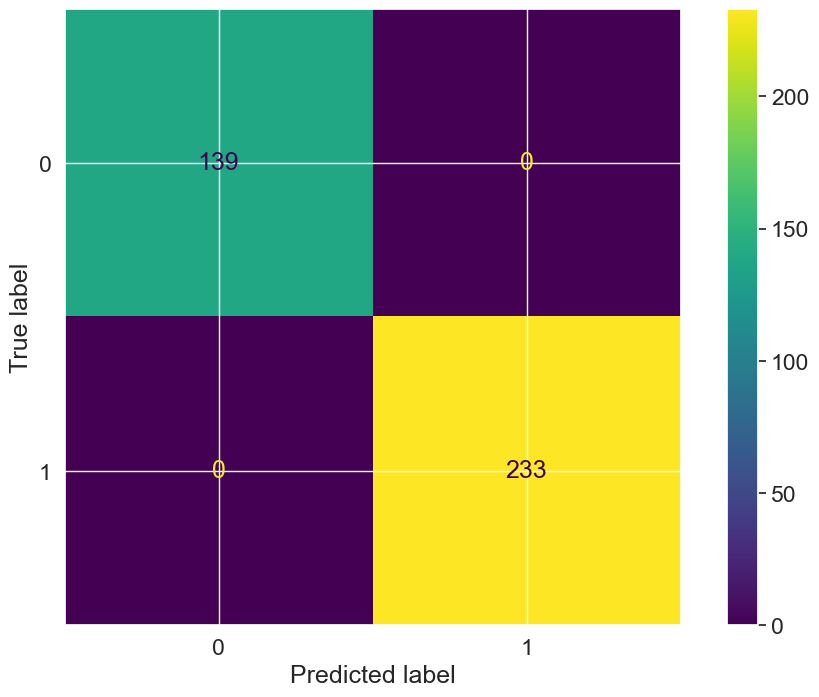

In [161]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='viridis')  
plt.grid(True)
plt.show()

In [162]:
#Improving the model by penalizing the coefficient magnitudes to mitigate overfitting model
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Logistic Regression Model
model_l1 = LogisticRegression(penalty='l1', C=0.1, solver='saga') #Increase regularization to increase penalty
model_l1.fit(X_train, y_train)
predictions = model_l1.predict(X_test)

In [163]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [164]:
print("Test data accuracy: ",model_l1.score(X_test,y_test))
print("Train data accuracy: ", model_l1.score(X_train, y_train))

Test data accuracy:  1.0
Train data accuracy:  1.0


<h3 style="color: #008080;">Confusion Matrix</h3>

<Figure size 600x400 with 0 Axes>

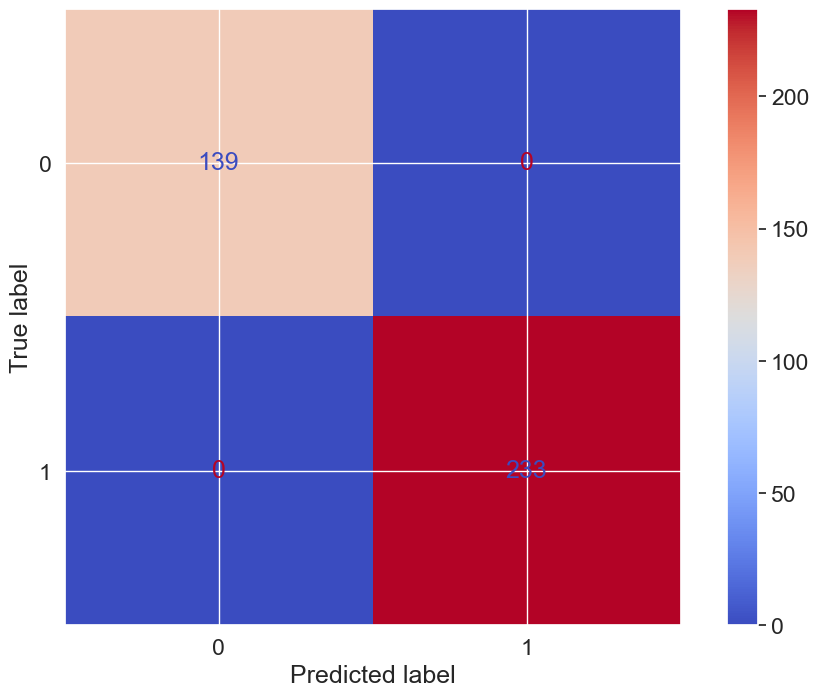

In [166]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='coolwarm')  
plt.grid(True)
plt.show()

In [167]:
#another technique cross validation to mitigate overfitting
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_l1, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validated scores:", scores)

Cross-validated scores: [1. 1. 1. 1. 1.]


<h2 style="color: #008080;">Selecting the Model: Decision Trees (tree-based)</h2>

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

<h3 style="color: #008080;">Metric</h3>

In [172]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [173]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  1.0
Train data accuracy:  1.0


<h3 style="color: #008080;">Confusion Matrix</h3>

In [175]:
cm = confusion_matrix(y_test, predictions)

<Figure size 600x400 with 0 Axes>

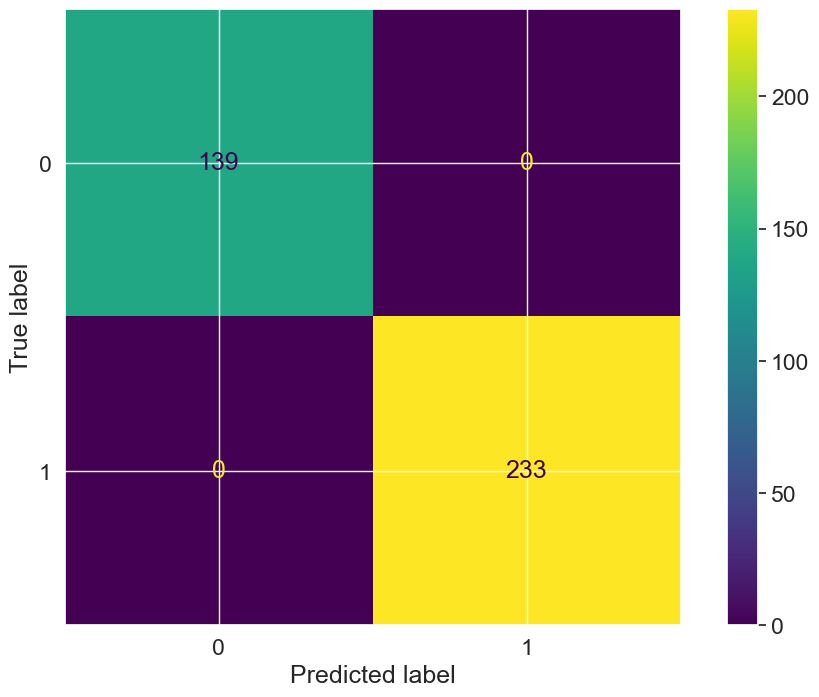

In [176]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='viridis')  
plt.grid(True)
plt.show()

<h3 style="color: #008080;">Hyperparameter</h3>

In [178]:
#Improving the model with hyperparameter to reduce the complexity and improve generalizability of the model
model = DecisionTreeClassifier(max_depth=2, min_samples_split=6, ccp_alpha=0.01, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, y_test)
print(f'Accuracy: {accuracy:.4f}')
print() 
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [179]:
#using different values for the max_depth parameter to train the model
model = DecisionTreeClassifier()
max_depth = range(1, 30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train, y_train))

In [180]:
#Accuracy
accuracy = accuracy_score(y_test, y_test)
print(f'Accuracy: {accuracy:.4f}')
print() 
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [181]:
import plotly.graph_objs as go

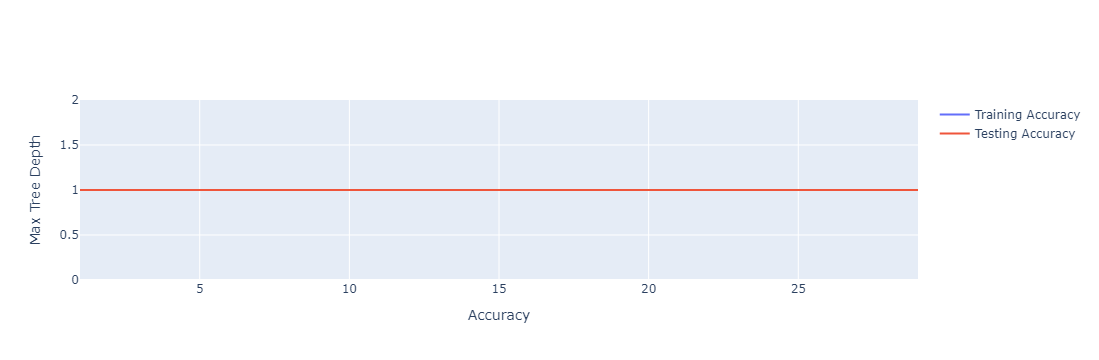

In [182]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(max_depth), y=train, name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(max_depth), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Accuracy', yaxis_title='Max Tree Depth', title='')
fig.show()

In [183]:
# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated scores for Decision Tree:", dt_cv_scores)


Cross-validated scores for Decision Tree: [0.99425287 1.         1.         1.         1.        ]


In [184]:
#Improving Decision tree model with Random forest
# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # More trees can increase stability
    max_depth=3,  # limit the depth to prevent individual trees from overfitting
    bootstrap=True,  # to reduce the variance
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

#classification report
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validated scores for Random Forest:", rf_cv_scores)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372

Cross-validated scores for Random Forest: [0.99425287 1.         1.         1.         1.        ]


<h2 style="color: #008080;">Selecting the Model: XGBoost</h2>

In [186]:
# no NaN values 
X = X.dropna()
y = y[X.index] 

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert data into DMatrix, a specialized data structure for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters 
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',
    'eta': 0.1,  # Learning rate
    'max_depth': 3  # Depth of each tree
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict test data
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [187]:
#Improving model with hyperparameters for controlling overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.01,
    n_estimators=1000,
    reg_alpha=0.5, # L1 regularization term to add sparsity
    reg_lambda=1.0, # L2 regularization term
    subsample=0.8, # Use subset of data per boosting round
    colsample_bytree=0.8, # Sub-sample features to grow each tree
    early_stopping_rounds=10
)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

y_pred = xgb_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[0]	validation_0-logloss:0.65248
[100]	validation_0-logloss:0.21058
[200]	validation_0-logloss:0.08183
[300]	validation_0-logloss:0.03398
[400]	validation_0-logloss:0.01551
[500]	validation_0-logloss:0.00820
[600]	validation_0-logloss:0.00509
[700]	validation_0-logloss:0.00353
[800]	validation_0-logloss:0.00289
[821]	validation_0-logloss:0.00287
Accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



<h2 style="color: #008080;">Selecting the Model: Support Vector Classification</h2>

In [189]:
#Selecting the Model: Support Vector Classification
from sklearn.svm import SVC
model = LinearSVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print() 
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [190]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  1.0
Train data accuracy:  1.0


<h3 style="color: #008080;">Confusion Matrix</h3>

<Figure size 800x600 with 0 Axes>

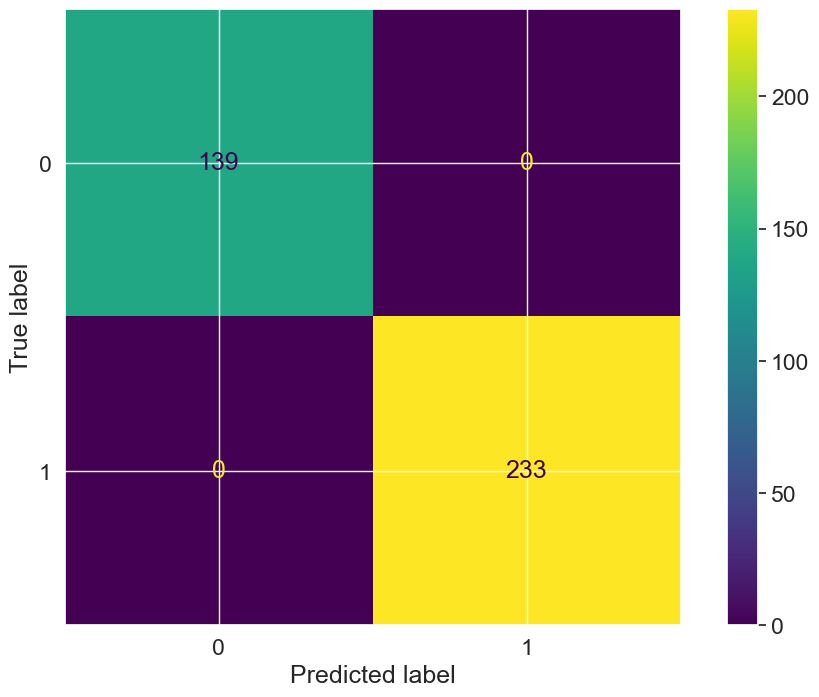

In [192]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis')  
plt.grid(True)
plt.show()

In [193]:
# Improving the model by setting a lower C and Lower gamma value to improve generalization
model = SVC(kernel='rbf', C=1.0, gamma=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print() 
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 0.9946

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       139
           1       0.99      1.00      1.00       233

    accuracy                           0.99       372
   macro avg       1.00      0.99      0.99       372
weighted avg       0.99      0.99      0.99       372



In [194]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.9946236559139785
Train data accuracy:  1.0


<Figure size 800x600 with 0 Axes>

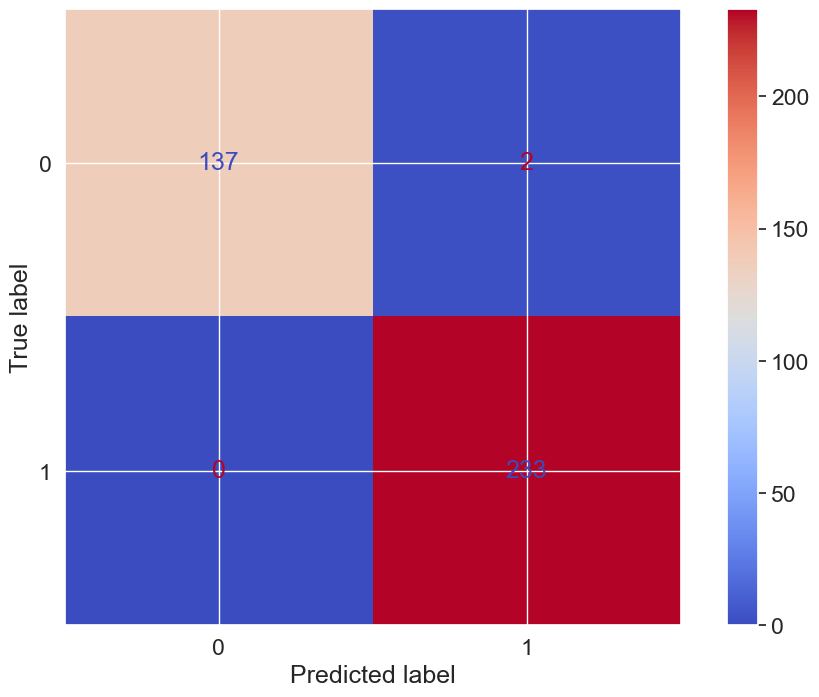

In [195]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='coolwarm')  
plt.grid(True)
plt.show()

<h1 style="color: #ffc512;">06 | Improving Models in terms of Overfitting with Principal Component Analysis</h1>

In [197]:
data = df_encoded
X = df_encoded.drop(['got_deal','total_deal_amount','number_of_sharks_in_deal','original_ask_amount','total_deal_equity',
                     'deal_valuation','valuation_requested'], axis=1) 
y = df_encoded.got_deal

In [198]:
#PCA is reducing the overfitting of models as it reduces dimentionality of data by limiting the principal components (in explaining the varinace)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data in order to use PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.03251428 0.02849217]


In [199]:
# Improve Logit model
model = LogisticRegression()
model.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)
#Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print() 
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 0.8145

              precision    recall  f1-score   support

           0       0.84      0.62      0.71       139
           1       0.80      0.93      0.86       233

    accuracy                           0.81       372
   macro avg       0.82      0.78      0.79       372
weighted avg       0.82      0.81      0.81       372



<Figure size 800x600 with 0 Axes>

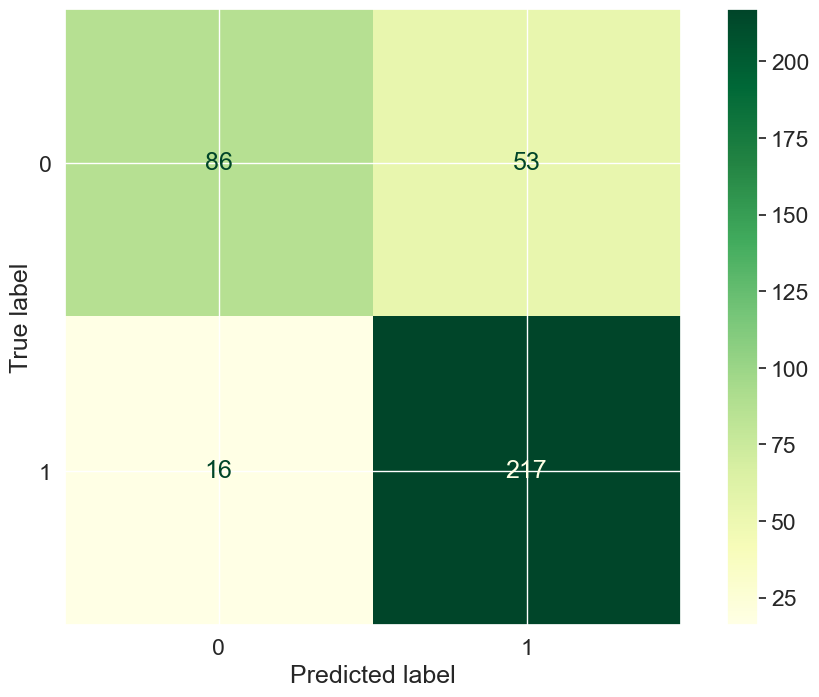

In [200]:
#Confusion Matrix Logit model
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='YlGn')  
plt.grid(True)
plt.show()

In [201]:
# Improve Decision tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)

# model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print()
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 0.8199

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       139
           1       0.91      0.79      0.85       233

    accuracy                           0.82       372
   macro avg       0.81      0.83      0.81       372
weighted avg       0.84      0.82      0.82       372



<Figure size 800x600 with 0 Axes>

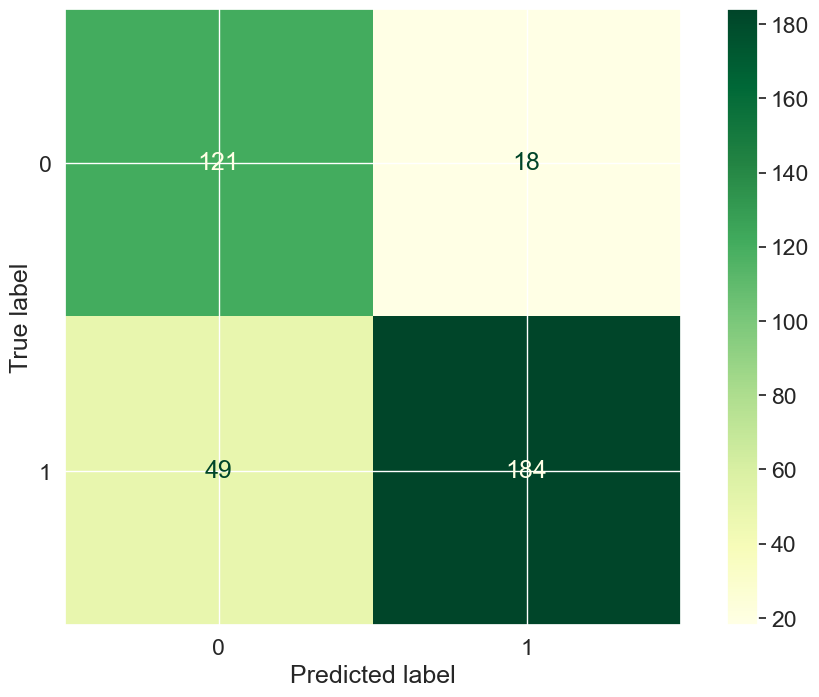

In [202]:
#Confusion Matrix Decision tree
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='YlGn')  
plt.grid(True)
plt.show()

In [203]:
#Improve Random Forest with PCA
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

predictions = model.predict(X_test_pca)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy:  0.8467741935483871

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       139
           1       0.87      0.89      0.88       233

    accuracy                           0.85       372
   macro avg       0.84      0.83      0.84       372
weighted avg       0.85      0.85      0.85       372



<Figure size 800x600 with 0 Axes>

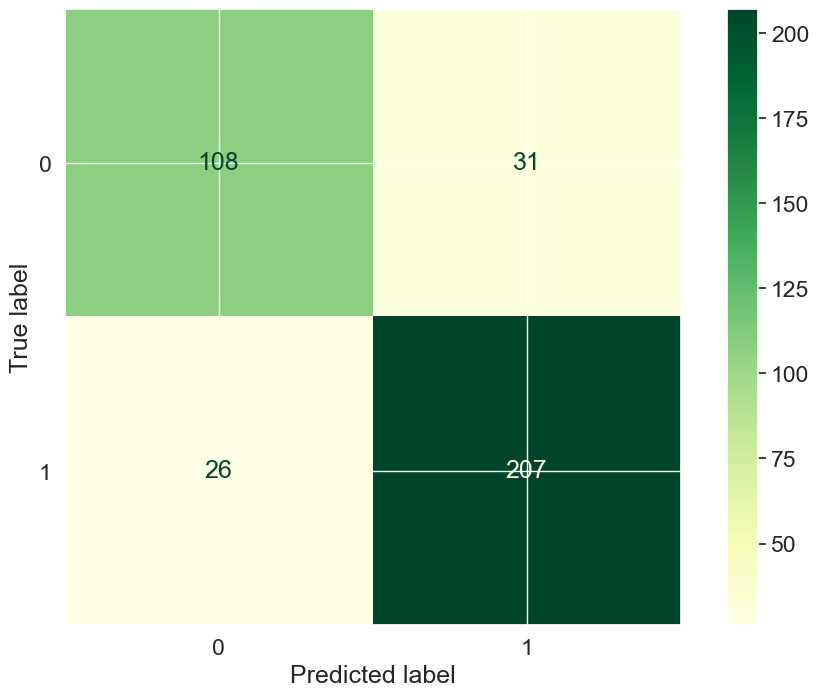

In [204]:
#Confusion Matrix Random Forest
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='YlGn')  
plt.grid(True)
plt.show()

In [205]:
# Improve XGBoost model
# check if y is one-hot encoded and if so convert it using argmax (resolving errors)
#To ensure y is categorical and one dimension and not one-hot encoded, it should be converted back to integers representing 1 dimension array class labels.
if y.ndim > 1 and y.shape[1] > 1:
    y = np.argmax(y, axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Determine the correct number of classes in y
num_classes = len(np.unique(y))

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    objective='multi:softmax',  # Use "multi:softmax" for direct label predictions
    num_class=num_classes,       # Specify the number of classes
    random_state=42
)
xgb_model.fit(X_train, y_train)

# predictions
y_pred = xgb_model.predict(X_test)

# model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report 
print(classification_report(y_test, y_pred))

Accuracy: 0.7473
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       139
           1       0.82      0.76      0.79       233

    accuracy                           0.75       372
   macro avg       0.73      0.74      0.74       372
weighted avg       0.75      0.75      0.75       372



<Figure size 800x600 with 0 Axes>

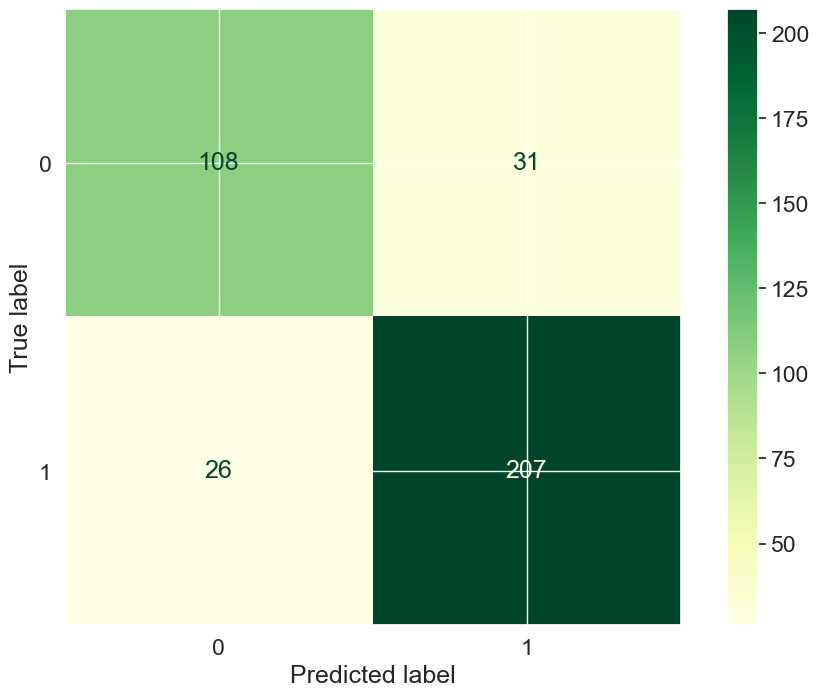

In [206]:
#Confusion Matrix Decision tree
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='YlGn')  
plt.grid(True)
plt.show()

In [207]:
# Improve SVC model
model = LinearSVC()
model.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)
# model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print()
print(classification_report(y_test, predictions))

Accuracy: 0.7473

              precision    recall  f1-score   support

           0       0.83      0.41      0.55       139
           1       0.73      0.95      0.82       233

    accuracy                           0.75       372
   macro avg       0.78      0.68      0.69       372
weighted avg       0.77      0.75      0.72       372



<Figure size 800x600 with 0 Axes>

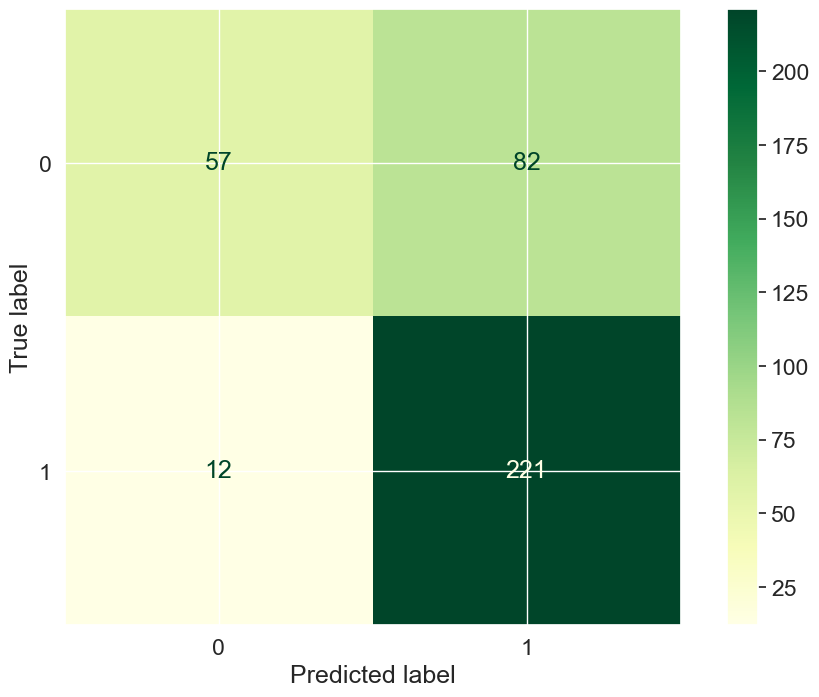

In [208]:
#Confusion Matrix SVC
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='YlGn')  
plt.grid(True)
plt.show()

<h2 style="color: #008080;">Imbalance Data</h2>

In [210]:
df_encoded['got_deal'].value_counts()

got_deal
1    756
0    482
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of deals')

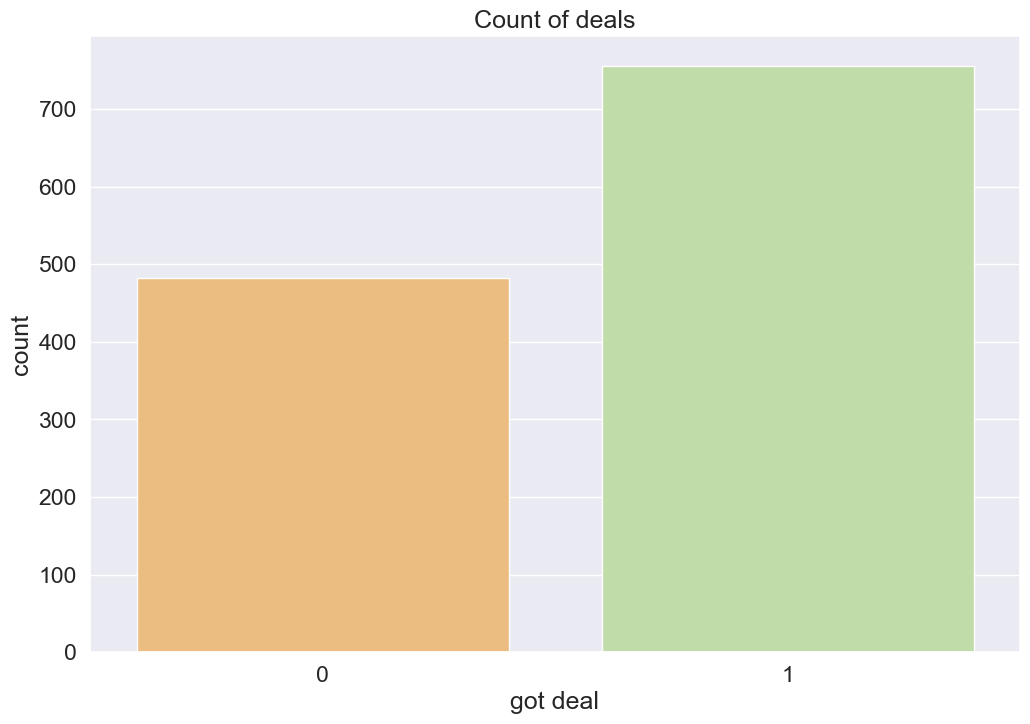

In [211]:
# plot distribution of deals
sns.countplot(data=df_encoded, x="got_deal", palette="Spectral")
plt.xlabel("got deal")
plt.title("Count of deals")

<h3 style="color: #008080;">Undersampling</h3>

In [213]:
from sklearn.utils import resample

In [214]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# concatenate X_train and y_train to handle resampling together
train = pd.concat([X_train, y_train], axis=1)

In [215]:
no_deal = train[train['got_deal']==0]
deal = train[train['got_deal']==1]

In [216]:
display(no_deal.shape)
display(deal.shape)

(343, 109)

(523, 109)

In [217]:
sampled_deal = resample(deal,
                                replace=True,  # Sample with replacement
                                n_samples=len(no_deal),  # Match number in majority class
                                random_state=42)  # Reproducible results

In [218]:
display(no_deal.shape)
display(sampled_deal.shape)

(343, 109)

(343, 109)

In [219]:
train_sampled = pd.concat([no_deal,sampled_deal])
train_sampled.sample(10)

original_offered_equity  investment_amount_per_shark  equity_per_shark  \
703                      10.0                     500000.0             10.00   
1167                     10.0                     200000.0             22.00   
905                      10.0                          0.0              0.00   
869                      25.0                     100000.0             33.30   
1262                     10.0                          0.0              0.00   
1106                     10.0                     125000.0              8.75   
363                      10.0                    1750000.0             25.00   
1035                     15.0                     150000.0             30.00   
514                      20.0                     300000.0              5.00   
1136                     10.0                          0.0              0.00   

      industry_business_services  industry_children/education  \
703                            0                            0   
1167                           0                            0   
905                            0                            0   
869                            0                            0   
1262                           0                            0   
1106                           0                            0   
363                            0                            0   
1035                           0                            0   
514                            0                            0   
1136                           0                            0   

      industry_electronics  industry_fashion/beauty  \
703                      0                        0   
1167                     0                        0   
905                      0                        1   
869                      0                        0   
1262                     0                        0   
1106                     0                        1   
363                      0                        0   
1035                     0                        0   
514                      0                        0   
1136                     0                        0   

      industry_fitness/sports/outdoors  industry_food_and_beverage  \
703                                  0                           0   
1167                                 0                           0   
905                                  0                           0   
869                                  0                           0   
1262                                 0                           1   
1106                                 0                           0   
363                                  1                           0   
1035                                 0                           0   
514                                  0                           0   
1136                                 0                           0   

      industry_green/cleantech  industry_health/wellness  \
703                          0                         0   
1167                         0                         0   
905                          0                         0   
869                          0                         0   
1262                         0                         0   
1106                         0                         0   
363                          0                         0   
1035                         0                         0   
514                          0                         0   
1136                         0                         0   

      industry_lifestyle/home  industry_liquor/alcohol  \
703                         0                        0   
1167                        0                        0   
905                         0                        0   
869                         0                        0   
1262                        0                        0   
1106                   

In [220]:
X_train = train_sampled.drop('got_deal',axis = 1).copy()
y_train = train_sampled['got_deal'].copy()

In [221]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [222]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

In [223]:
#Metric
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print()
print(classification_report(y_test, predictions))

Accuracy: 1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



<h3 style="color: #008080;">Oversampling with SMOTE</h3>

In [225]:
from imblearn.over_sampling import SMOTE

In [226]:
X = df_encoded.drop(['got_deal','total_deal_amount','number_of_sharks_in_deal','original_ask_amount','total_deal_equity',
                     'deal_valuation','valuation_requested'], axis=1) 
y = df_encoded.got_deal          

X = X.dropna()
y = y.loc[X.index]

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# train-test split with re-sampled 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, stratify=y_sm, random_state=42)

In [227]:
y.value_counts()

got_deal
1    756
0    482
Name: count, dtype: int64

In [228]:
y_sm.value_counts()

got_deal
1    756
0    756
Name: count, dtype: int64

In [229]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [230]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

In [231]:
#Metric
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       227

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454



<h3 style="color: #008080;">Undersampling with TomeLinks</h3>

In [233]:
from imblearn.under_sampling import TomekLinks 

In [234]:
X = df_encoded.drop(['got_deal','total_deal_amount','number_of_sharks_in_deal','original_ask_amount','total_deal_equity',
                     'deal_valuation','valuation_requested'], axis=1) 
y = df_encoded.got_deal      

In [235]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=42)

In [237]:
y.value_counts()

got_deal
1    756
0    482
Name: count, dtype: int64

In [238]:
y_tl.value_counts()

got_deal
1    756
0    482
Name: count, dtype: int64

In [239]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [240]:
predictions = model.predict(X_test)

In [241]:
# model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print()
#Metrics
print(classification_report(y_test, predictions))

Accuracy: 1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



<h2 style="color: #008080;">Normalizing the Data</h2>

### Normalization with MinMax Scaler

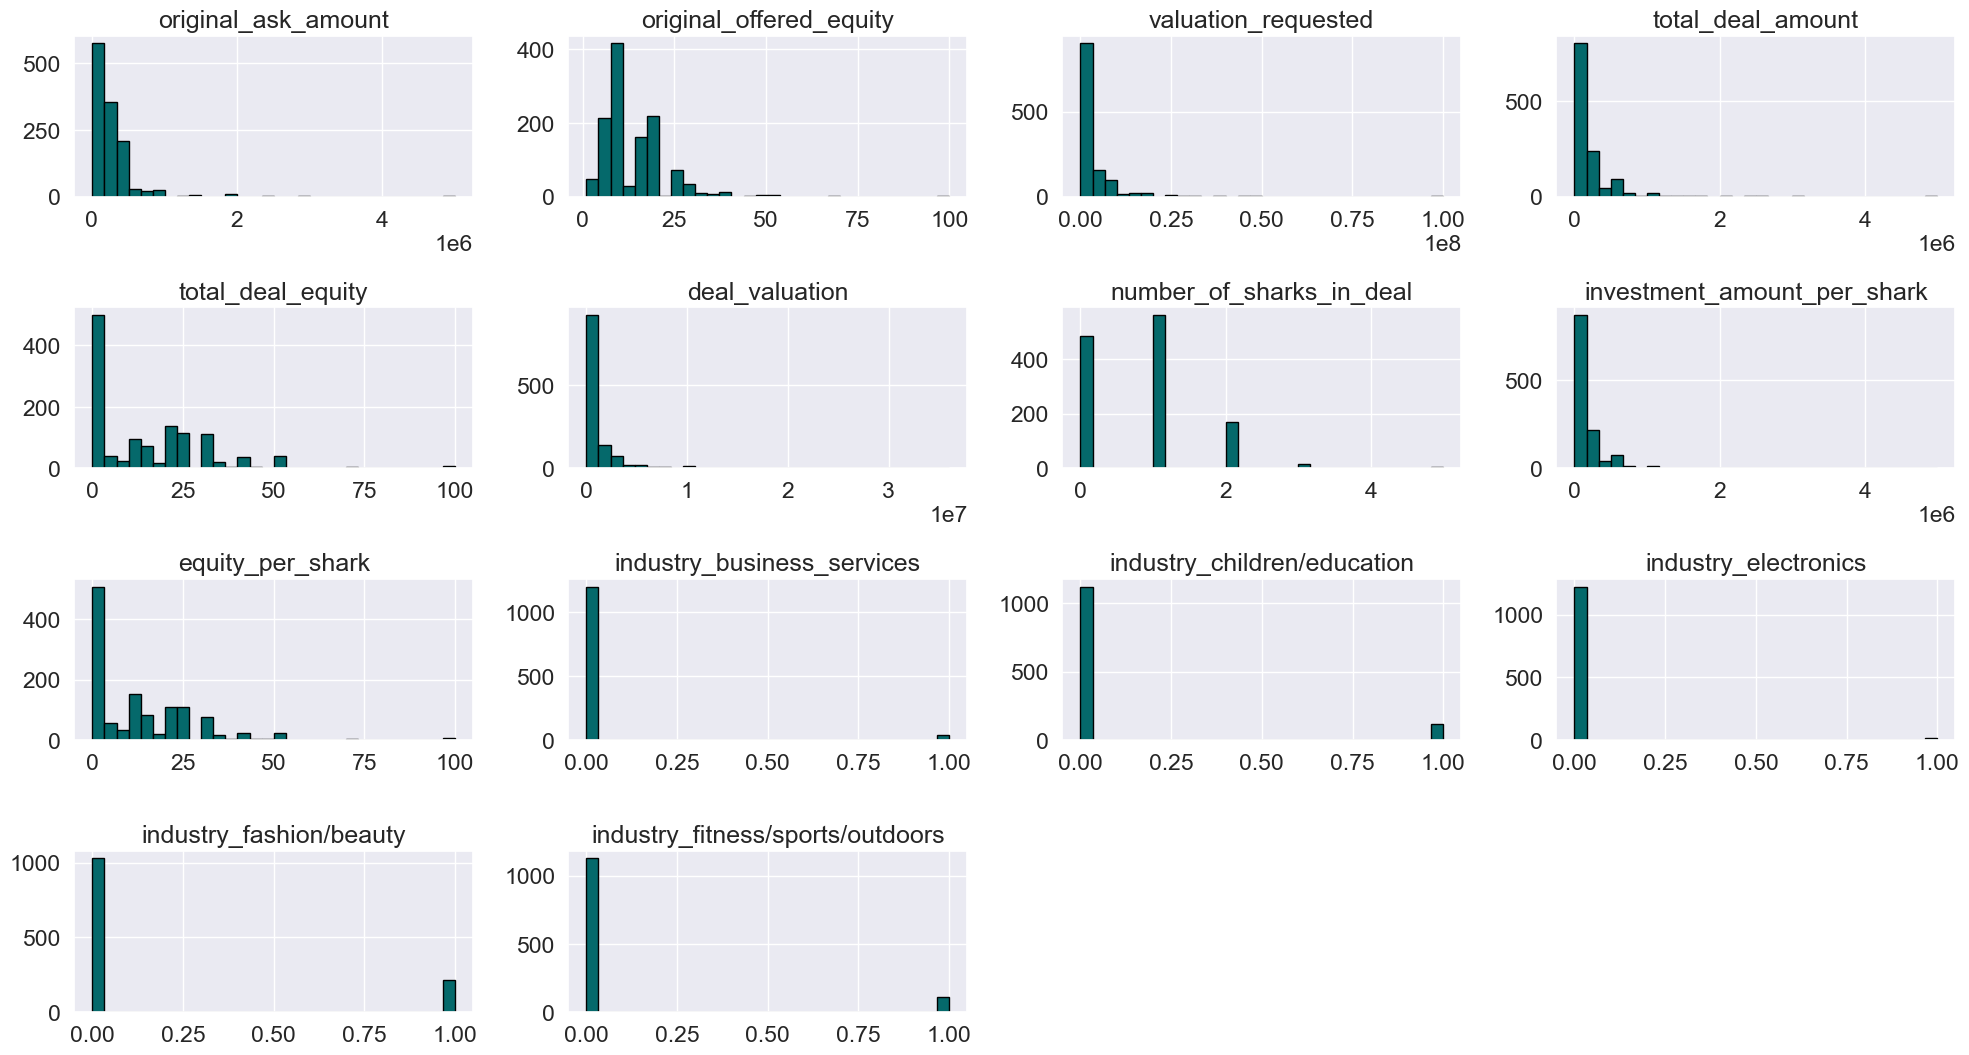

In [244]:
#Noramlization with MinMax Scale
color = '#05696b'

# grid size
nrows, ncols = 6, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_encoded.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df_encoded.columns[i])

plt.tight_layout()
plt.show()

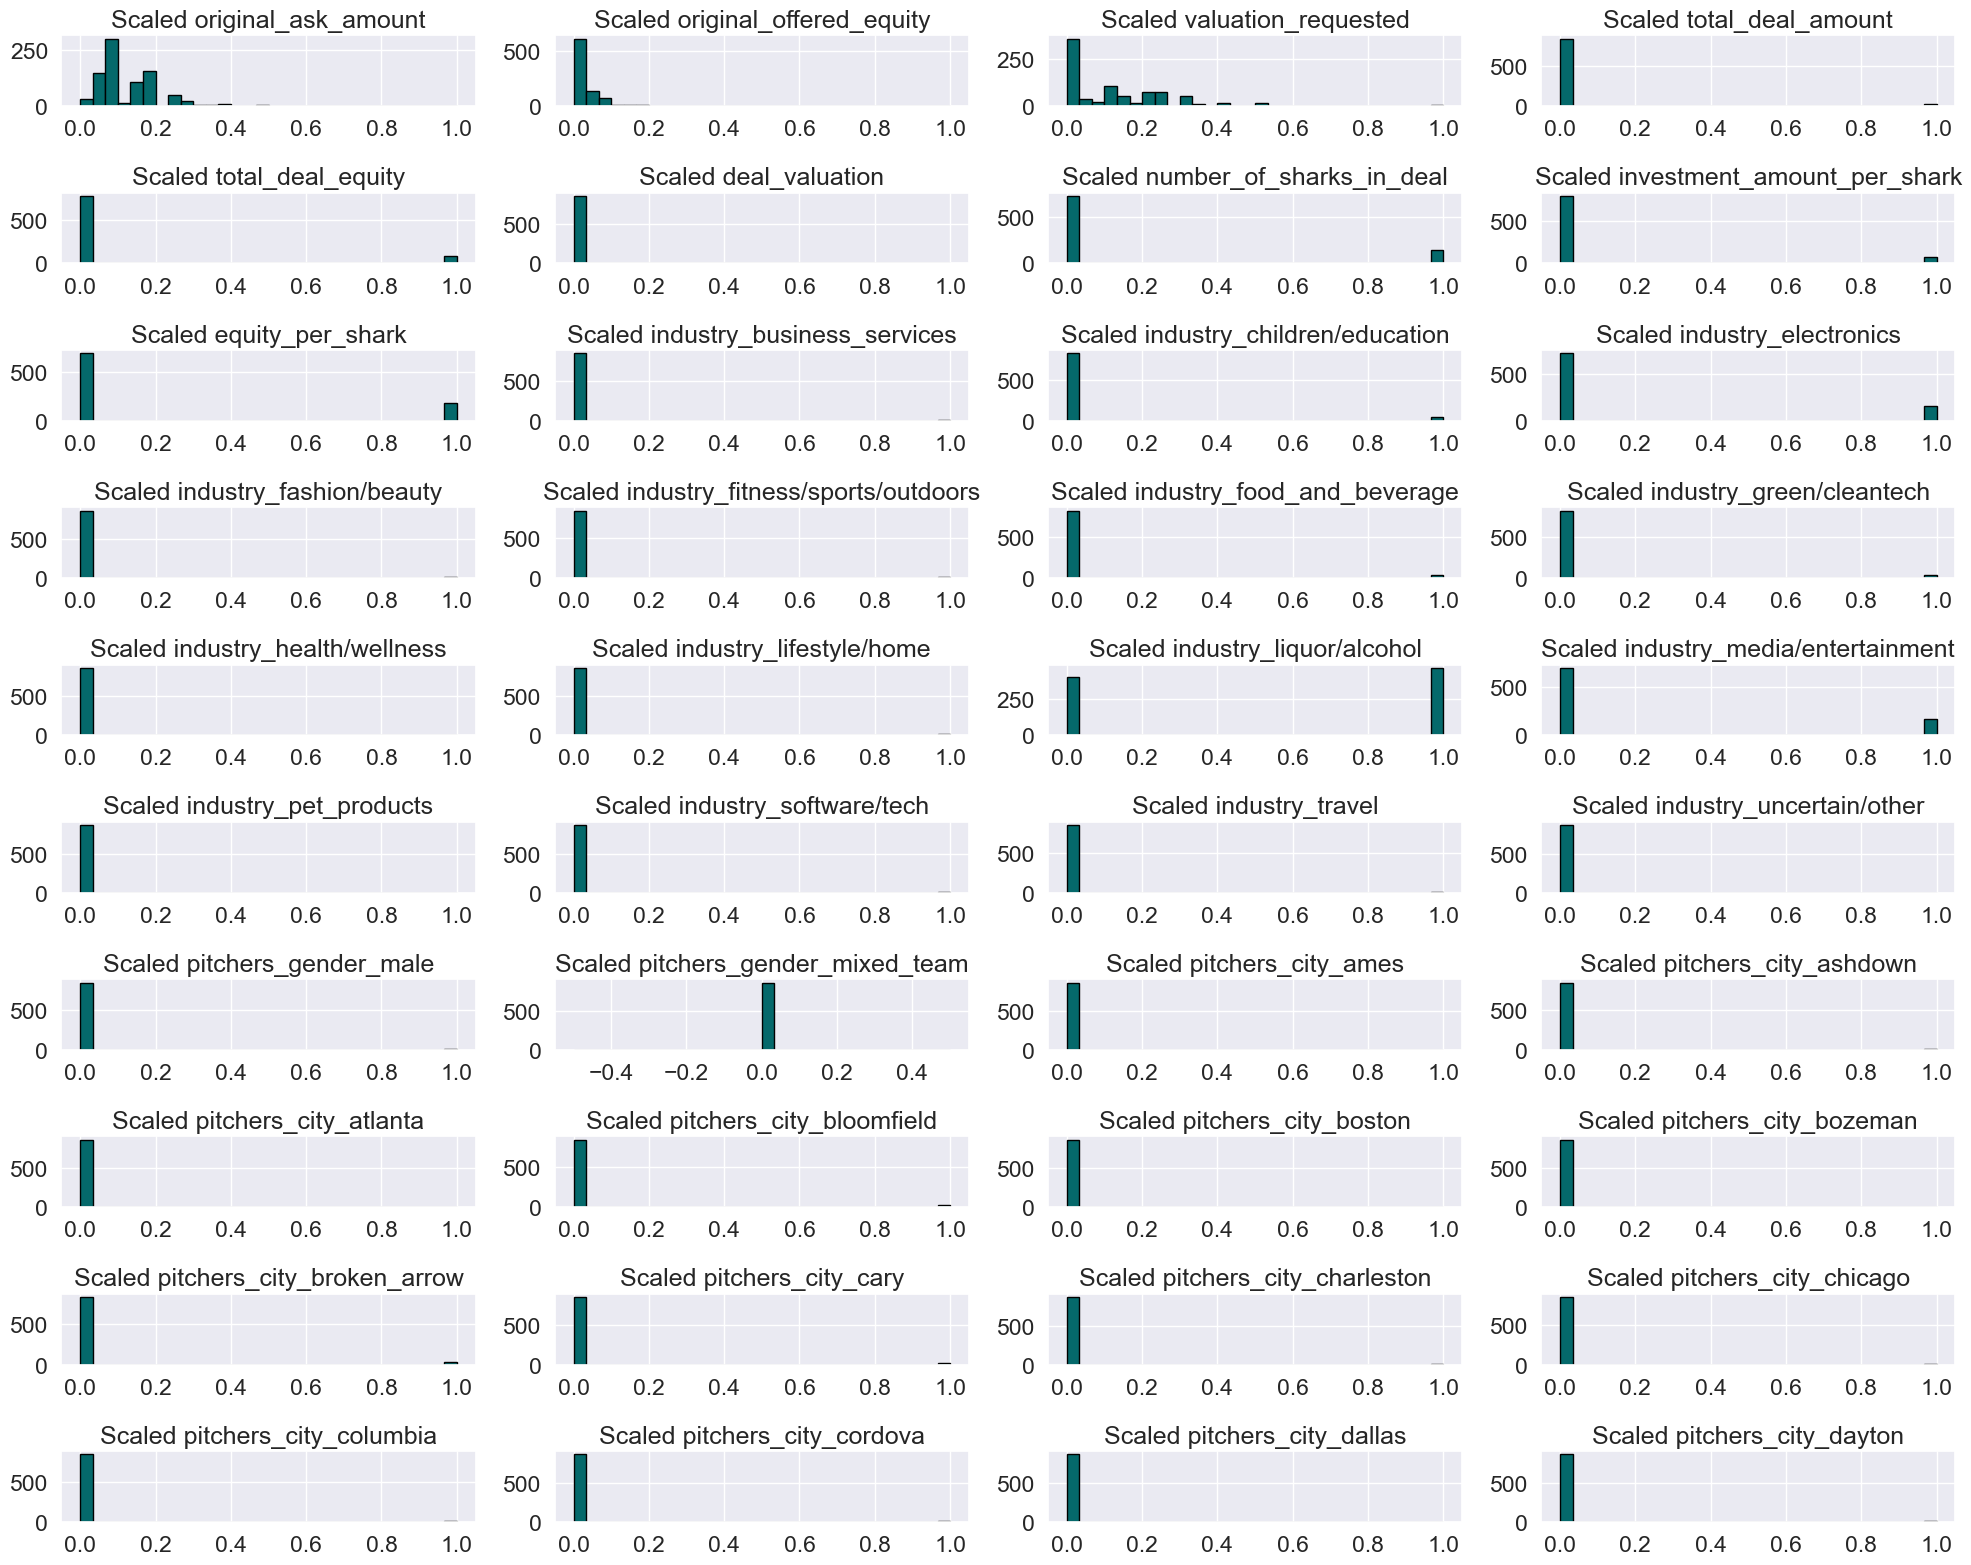

In [245]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


color = '#05696b'

nrows, ncols = 10, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df_encoded.columns[i]}')

plt.tight_layout()
plt.show()

In [246]:
#Logit model:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       139
           1       0.98      0.97      0.97       233

    accuracy                           0.97       372
   macro avg       0.96      0.97      0.97       372
weighted avg       0.97      0.97      0.97       372



In [247]:
print("Test data accuracy: ",model.score(X_test_scaled,y_test))
print("Train data accuracy: ", model.score(X_train_scaled, y_train))

Test data accuracy:  0.967741935483871
Train data accuracy:  0.9803695150115473


In [248]:
#Decision tree

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print()
print(classification_report(y_test, predictions))

Accuracy: 1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [249]:
print("Test data accuracy: ",model.score(X_test_scaled,y_test))
print("Train data accuracy: ", model.score(X_train_scaled, y_train))

Test data accuracy:  1.0
Train data accuracy:  1.0


In [250]:
#xgboost
# Allocate train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features separately for train and test set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data into DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict on test data
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       233

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [251]:
#Selecting the Model: Support Vector Classification

model = LinearSVC()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
#Metrics
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
print()
print(classification_report(y_test, predictions))

Accuracy: 0.9624

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       139
           1       1.00      0.94      0.97       233

    accuracy                           0.96       372
   macro avg       0.95      0.97      0.96       372
weighted avg       0.97      0.96      0.96       372



In [252]:
print("Test data accuracy: ",model.score(X_test_scaled,y_test))
print("Train data accuracy: ", model.score(X_train_scaled, y_train))

Test data accuracy:  0.9623655913978495
Train data accuracy:  0.9965357967667436


In [253]:
df.to_csv('my_data.csv', index=False)